# Preparación del modelo

## Importación de librerías

In [374]:
import glob, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
import seaborn as sns

# Carga de datos

## Geodataframe

In [375]:
list_cvo = [
  '0600200010676', '0600200010727', '0600200011142', '0600200010411',
  '0600200011068', '0600200010708', '0600200011458', '0600200010318',
  '0600200010680', '0600200010712', '0600200010746', '0600200010750',
  '0600200011227', '0600200011265', '060020001127A', '0600200010801',
  '0600200010835', '0600200010924', '0600200011439', '0600200010322',
  '060020001077A', '0600200011528', '0600200011053', '0600200011072',
  '0600200010731', '0601000010362',"0600200011301" ,"0600200011481" ,
  "0600200011640" ,"0600200010074" ,"060020001166A" ,"0600200010074",
  "0600200011655" ,"060020001006A" ,"0600200010981" ,"0600200011462",
  "0600200010765" ,"0600200011513" ,"0600200011123" ,"0600200011617",
  "0600200010816" ,"0600200011621" ,"0600200011636" ,"0600200011710"]

In [376]:
agebs = gpd.read_file("data/colima/agebs_repro.gpkg")
agebs = agebs[agebs["CVEGEO"].isin(list_cvo)]

agebs_proceso = agebs.copy()
agebs["area"] = agebs.area / 1000 # ha
agebs.drop(columns=["CVE_ENT","CVE_MUN", "CVE_AGEB","CVE_LOC","geometry"], inplace=True)
agebs = pd.DataFrame(agebs)

<Axes: >

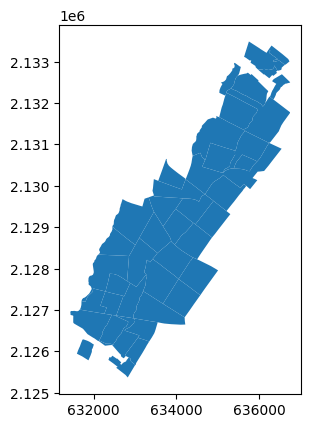

In [377]:
#agebs_proceso = agebs_proceso.to_crs("EPSG:4326")
agebs_proceso.plot()

In [378]:
agebs_proceso.to_file("data/colima/agebs_proceso.gpkg", driver="GPKG")

## Zonal Statistics

In [379]:
df0 = pd.read_csv('data/megaGDF.csv')
df0.drop(columns=["CVE_ENT","CVE_MUN","CVE_LOC", "_count","_sum"], inplace=True)
df0.head()

CVEGEO CVE_AGEB  _mean  class  time
0  0600200011640     1640    NaN  Depth     0
1  0600200011617     1617    NaN  Depth     0
2  0600200011621     1621    NaN  Depth     0
3  0600200010676     0676    NaN  Depth     0
4  0600200010727     0727    NaN  Depth     0

In [380]:
df = df0.pivot_table(index=["CVEGEO",'CVE_AGEB',"time"], columns='class', values=["_mean"])
df.reset_index(inplace=True)
# remove double header
df.columns = df.columns.droplevel(0)
df.columns = ['CVEGEO', 'CVE_AGEB',"time", 'Depth', 'Rain', 'Velocity']
df

CVEGEO CVE_AGEB   time     Depth  Rain  Velocity
0     060020001006A     006A      0       NaN  0.00       NaN
1     060020001006A     006A    300       NaN  0.00       NaN
2     060020001006A     006A    600       NaN  0.72       NaN
3     060020001006A     006A    900       NaN  0.72       NaN
4     060020001006A     006A   1200       NaN  1.38       NaN
...             ...      ...    ...       ...   ...       ...
3506  0601000010362     0362  23100  0.016889  4.80  0.070683
3507  0601000010362     0362  23400  0.016851  8.76  0.070517
3508  0601000010362     0362  23700  0.016796  8.76  0.070501
3509  0601000010362     0362  24000  0.016748  7.80  0.070419
3510  0601000010362     0362  24300  0.021053   NaN       NaN

[3511 rows x 6 columns]

In [381]:
df = df.merge(agebs, on="CVEGEO")
df

CVEGEO CVE_AGEB   time     Depth  Rain  Velocity        area
0     060020001006A     006A      0       NaN  0.00       NaN   95.798368
1     060020001006A     006A    300       NaN  0.00       NaN   95.798368
2     060020001006A     006A    600       NaN  0.72       NaN   95.798368
3     060020001006A     006A    900       NaN  0.72       NaN   95.798368
4     060020001006A     006A   1200       NaN  1.38       NaN   95.798368
...             ...      ...    ...       ...   ...       ...         ...
3506  0601000010362     0362  23100  0.016889  4.80  0.070683  228.309668
3507  0601000010362     0362  23400  0.016851  8.76  0.070517  228.309668
3508  0601000010362     0362  23700  0.016796  8.76  0.070501  228.309668
3509  0601000010362     0362  24000  0.016748  7.80  0.070419  228.309668
3510  0601000010362     0362  24300  0.021053   NaN       NaN  228.309668

[3511 rows x 7 columns]

## Denue and INV

In [382]:
denue_inv = pd.read_csv('data/denue_inv.csv')
denue_inv.head()

CVE_AGEB  POBTOT  POB0_14_P  P15A29A_P  P30A59A_P   GRAPROES    P_CD_P  \
0     0273      74   6.349231   7.081538  13.980769   3.403077  3.540769   
1     0318    1925  11.397551  17.568980  31.385102  10.333878  7.330000   
2     0322    2143  11.647736  17.747170  30.118113  11.442453  7.085472   
3     0362    2342  18.422286  21.292000  33.820000   9.617714  5.100857   
4     0411    1116   9.866053  17.035000  33.167105  11.912895  4.348947   

   VPH_C_EL_P  VPH_EXSA_P  VPH_DREN_P  ...  TRANSCOL_C  ARBOLES_C  ACESOAUT_C  \
0   30.769231   29.486923   30.769231  ...    2.923077   2.384615    3.000000   
1   85.303878   85.473878   85.473878  ...    2.346939   1.653061    2.938776   
2   88.486038   88.553396   88.553396  ...    2.716981   1.320755    3.000000   
3   91.145714   91.380857   91.380857  ...    2.771429   1.285714    3.000000   
4   81.578947   81.578947   81.578947  ...    2.868421   1.736842    1.236842   

   PUESSEMI_C  PUESAMBU_C  agua  electricidad  escuela  refugios  salud  
0    3.000000    3.000000   NaN           NaN      NaN       NaN    NaN  
1    2.979592    2.918367   0.0           0.0      6.0       0.0   16.0  
2    2.924528    2.849057   0.0           0.0      5.0       0.0   14.0  
3    2.914286    2.914286   NaN           NaN      NaN       NaN    NaN  
4    2.973684    2.921053   1.0           0.0      7.0       0.0    1.0  

[5 rows x 30 columns]

In [383]:

# check if all the CVEGEO from gpkg_gdf are in the list list_cvo
denue_inv["CVE_AGEB"].isin(agebs_proceso.CVE_AGEB.unique()).all()

False

## Join

In [384]:
df_full = df.merge(denue_inv, on="CVE_AGEB")
df_full

CVEGEO CVE_AGEB   time     Depth  Rain  Velocity        area  \
0     0600200010318     0318      0       NaN  0.00       NaN  341.274721   
1     0600200010318     0318    300       NaN  0.00       NaN  341.274721   
2     0600200010318     0318    600       NaN  0.72       NaN  341.274721   
3     0600200010318     0318    900       NaN  0.72       NaN  341.274721   
4     0600200010318     0318   1200       NaN  1.38       NaN  341.274721   
...             ...      ...    ...       ...   ...       ...         ...   
2123  0601000010362     0362  23100  0.016889  4.80  0.070683  228.309668   
2124  0601000010362     0362  23400  0.016851  8.76  0.070517  228.309668   
2125  0601000010362     0362  23700  0.016796  8.76  0.070501  228.309668   
2126  0601000010362     0362  24000  0.016748  7.80  0.070419  228.309668   
2127  0601000010362     0362  24300  0.021053   NaN       NaN  228.309668   

      POBTOT  POB0_14_P  P15A29A_P  ...  TRANSCOL_C  ARBOLES_C  ACESOAUT_C  \
0       1925  11.397551   17.56898  ...    2.346939   1.653061    2.938776   
1       1925  11.397551   17.56898  ...    2.346939   1.653061    2.938776   
2       1925  11.397551   17.56898  ...    2.346939   1.653061    2.938776   
3       1925  11.397551   17.56898  ...    2.346939   1.653061    2.938776   
4       1925  11.397551   17.56898  ...    2.346939   1.653061    2.938776   
...      ...        ...        ...  ...         ...        ...         ...   
2123    2342  18.422286   21.29200  ...    2.771429   1.285714    3.000000   
2124    2342  18.422286   21.29200  ...    2.771429   1.285714    3.000000   
2125    2342  18.422286   21.29200  ...    2.771429   1.285714    3.000000   
2126    2342  18.422286   21.29200  ...    2.771429   1.285714    3.000000   
2127    2342  18.422286   21.29200  ...    2.771429   1.285714    3.000000   

      PUESSEMI_C  PUESAMBU_C  agua  electricidad  escuela  refugios  salud  
0       2.979592    2.918367   0.0           0.0      6.0       0.0   16.0  
1       2.979592    2.918367   0.0           0.0      6.0       0.0   16.0  
2       2.979592    2.918367   0.0           0.0      6.0       0.0   16.0  
3       2.979592    2.918367   0.0           0.0      6.0       0.0   16.0  
4       2.979592    2.918367   0.0           0.0      6.0       0.0   16.0  
...          ...         ...   ...           ...      ...       ...    ...  
2123    2.914286    2.914286   NaN           NaN      NaN       NaN    NaN  
2124    2.914286    2.914286   NaN           NaN      NaN       NaN    NaN  
2125    2.914286    2.914286   NaN           NaN      NaN       NaN    NaN  
2126    2.914286    2.914286   NaN           NaN      NaN       NaN    NaN  
2127    2.914286    2.914286   NaN           NaN      NaN       NaN    NaN  

[2128 rows x 36 columns]

In [385]:
agebs_proceso

CVEGEO CVE_ENT CVE_MUN CVE_LOC CVE_AGEB  \
24   0600200011640      06     002    0001     1640   
29   0600200011617      06     002    0001     1617   
30   0600200011621      06     002    0001     1621   
31   0600200010676      06     002    0001     0676   
32   0600200010727      06     002    0001     0727   
36   0600200011142      06     002    0001     1142   
40   0600200010411      06     002    0001     0411   
45   0600200011481      06     002    0001     1481   
50   0600200011068      06     002    0001     1068   
53   0600200010708      06     002    0001     0708   
54   0600200011458      06     002    0001     1458   
58   0600200010318      06     002    0001     0318   
62   0600200010680      06     002    0001     0680   
63   0600200010712      06     002    0001     0712   
64   0600200010746      06     002    0001     0746   
65   0600200010750      06     002    0001     0750   
66   0600200010765      06     002    0001     0765   
67   0600200010816      06     002    0001     0816   
69   0600200011123      06     002    0001     1123   
71   0600200011227      06     002    0001     1227   
75   0600200011265      06     002    0001     1265   
76   060020001127A      06     002    0001     127A   
82   0600200010801      06     002    0001     0801   
84   0600200010835      06     002    0001     0835   
92   0600200010924      06     002    0001     0924   
100  0600200011439      06     002    0001     1439   
101  0600200011462      06     002    0001     1462   
102  0600200010322      06     002    0001     0322   
105  060020001077A      06     002    0001     077A   
107  0600200010981      06     002    0001     0981   
118  0600200011513      06     002    0001     1513   
119  0600200011528      06     002    0001     1528   
120  0600200011301      06     002    0001     1301   
121  0600200011053      06     002    0001     1053   
122  0600200011072      06     002    0001     1072   
123  0600200010731      06     002    0001     0731   
127  060020001166A      06     002    0001     166A   
137  0600200011710      06     002    0001     1710   
138  060020001006A      06     002    0001     006A   
139  0600200010074      06     002    0001     0074   
140  0600200011655      06     002    0001     1655   
141  0600200011636      06     002    0001     1636   
470  0601000010362      06     010    0001     0362   

                                              geometry  
24   MULTIPOLYGON (((635481.389 2132657.115, 635481...  
29   MULTIPOLYGON (((632971.765 2126796.935, 632973...  
30   MULTIPOLYGON (((633344.752 2126236.664, 633287...  
31   MULTIPOLYGON (((634027.336 2129950.192, 634132...  
32   MULTIPOLYGON (((633395.848 2129528.302, 633418...  
36   MULTIPOLYGON (((631778.801 2126986.659, 631993...  
40   MULTIPOLYGON (((634633.921 2130685.137, 634669...  
45   MULTIPOLYGON (((635729.596 2132734.627, 635773...  
50   MULTIPOLYGON (((635037.162 2131658.661, 635037...  
53   MULTIPOLYGON (((633960.923 2128575.530, 633901...  
54   MULTIPOLYGON (((632582.166 2127372.180, 632582...  
58   MULTIPOLYGON (((634861.925 2129585.572, 634861...  
62   MULTIPOLYGON (((633459.628 2129767.513, 633468...  
63   MULTIPOLYGON (((634504.664 2128222.765, 634415...  
64   MULTIPOLYGON (((634055.912 2127747.377, 633952...  
65   MULTIPOLYGON (((633588.920 2128113.635, 633589...  
66   MULTIPOLYGON (((634200.944 2126822.192, 634186...  
67   MULTIPOLYGON (((633344.752 2126236.664, 633302...  
69   MULTIPOLYGON (((632213.697 2127246.890, 632198...  
71   MULTIPOLYGON (((635635.055 2131349.999, 635544...  
75   MULTIPOLYGON (((633543.819 2128373.645, 633512...  
76   MULTIPOLYGON (((632857.223 2128295.836, 632857...  
82   MULTIPOLYGON (((634106.173 2126643.029, 633975...  
84   MULTIPOLYGON (((635552.402 2129947.970, 635552...  
92   MULTIPOLYGON (((636545.955 2130895.688, 636543...  
100  MULTIPOLYGON (((632472.311 2126156.079, 632434...  
101  MULTIPOLYGON (((633238.005 2127556.405, 633224.

In [386]:
df_full_agebs = gpd.GeoDataFrame(df_full.merge(agebs_proceso, on="CVEGEO"))

df_full_agebs.to_file('data/analisis_datos.gpkg', driver='GPKG')

In [387]:
df_full.sort_values(by=["time"], inplace=True)
df_full

CVEGEO CVE_AGEB   time     Depth  Rain  Velocity        area  \
0     0600200010318     0318      0       NaN   0.0       NaN  341.274721   
245   0600200010676     0676      0       NaN   0.0       NaN  383.927539   
327   0600200010680     0680      0       NaN   0.0       NaN  316.683715   
409   0600200010708     0708      0       NaN   0.0       NaN  316.517587   
490   0600200010712     0712      0       NaN   0.0       NaN  419.807238   
...             ...      ...    ...       ...   ...       ...         ...   
1963  0600200011458     1458  24300  0.047361   NaN       NaN  206.615990   
653   0600200010727     0727  24300  0.075082   NaN       NaN  659.372424   
735   0600200010731     0731  24300  0.088734   NaN       NaN  359.429639   
1390  0600200011068     1068  24300  0.142666   NaN       NaN  718.816563   
2127  0601000010362     0362  24300  0.021053   NaN       NaN  228.309668   

      POBTOT  POB0_14_P  P15A29A_P  ...  TRANSCOL_C  ARBOLES_C  ACESOAUT_C  \
0       1925  11.397551  17.568980  ...    2.346939   1.653061    2.938776   
245     2119  18.954194  19.591290  ...    2.806452   1.451613    3.000000   
327     1467  10.623214  20.527500  ...    2.392857   1.464286    3.000000   
409     1086   9.315185  16.823333  ...    2.666667   1.555556    3.000000   
490     2482  12.117353  21.365588  ...    2.529412   1.705882    3.000000   
...      ...        ...        ...  ...         ...        ...         ...   
1963    2076  16.024412  17.380588  ...    2.735294   1.500000    3.000000   
653     4375  15.677234  19.972128  ...    2.468085   1.425532    2.914894   
735     2350  13.676977  19.811395  ...    2.813953   1.395349    3.000000   
1390    1974  15.855957  21.856170  ...    2.638298   1.319149    1.106383   
2127    2342  18.422286  21.292000  ...    2.771429   1.285714    3.000000   

      PUESSEMI_C  PUESAMBU_C  agua  electricidad  escuela  refugios  salud  
0       2.979592    2.918367   0.0           0.0      6.0       0.0   16.0  
245     2.838710    2.935484   0.0           0.0      7.0       0.0    1.0  
327     3.000000    2.857143   0.0           0.0     10.0       1.0    4.0  
409     2.925926    2.888889   0.0           0.0      9.0       0.0   22.0  
490     3.000000    2.911765   0.0           1.0      8.0       0.0   13.0  
...          ...         ...   ...           ...      ...       ...    ...  
1963    2.764706    2.882353   0.0           0.0      5.0       0.0    6.0  
653     2.936170    2.872340   0.0           0.0      4.0       0.0    4.0  
735     2.930233    2.930233   0.0           0.0      4.0       0.0    2.0  
1390    2.957447    2.957447   0.0           0.0      1.0       0.0    1.0  
2127    2.914286    2.914286   NaN           NaN      NaN       NaN    NaN  

[2128 rows x 36 columns]

In [388]:
df_full.columns

Index(['CVEGEO', 'CVE_AGEB', 'time', 'Depth', 'Rain', 'Velocity', 'area',
       'POBTOT', 'POB0_14_P', 'P15A29A_P', 'P30A59A_P', 'GRAPROES', 'P_CD_P',
       'VPH_C_EL_P', 'VPH_EXSA_P', 'VPH_DREN_P', 'RECUCALL_C', 'RAMPAS_C',
       'PASOPEAT_C', 'BANQUETA_C', 'CICLOVIA_C', 'CICLOCAR_C', 'ALUMPUB_C',
       'SEMAAUDI_C', 'PARATRAN_C', 'DRENAJEP_C', 'TRANSCOL_C', 'ARBOLES_C',
       'ACESOAUT_C', 'PUESSEMI_C', 'PUESAMBU_C', 'agua', 'electricidad',
       'escuela', 'refugios', 'salud'],
      dtype='object')

In [389]:
# Calcular la cantidad de agua acumulada por área durante la tormenta
df_full["acum_agua"] = df_full["Depth"] * df_full["area"]

df_proceso = df_full.copy()
df_visual = df_full.copy()

print(df_full.shape, "df_full")
print(df_proceso.shape, "df_proceso")
print(df_visual.shape, "df_visual")

# Calcular el índice de riesgo basado en la cantidad de agua acumulada y la densidad poblacional
df_full["riesgo"] = np.where(df_full["POBTOT"] == 0, 0, df_full["acum_agua"] / df_full["POBTOT"])

(2128, 37) df_full
(2128, 37) df_proceso
(2128, 37) df_visual


In [390]:
list_area = ["POBTOT",'RECUCALL_C', 'RAMPAS_C', 'PASOPEAT_C',
       'BANQUETA_C', 'CICLOVIA_C', 'CICLOCAR_C', 'ALUMPUB_C', 'SEMAAUDI_C',
       'PARATRAN_C', 'DRENAJEP_C', 'TRANSCOL_C', 'ARBOLES_C', 'ACESOAUT_C',
       'PUESSEMI_C', 'PUESAMBU_C', 'agua', 'electricidad',
       'escuela', 'refugios', 'salud']

for i in list_area:
    df_full[i] = df_full[i] / df_full["area"]

In [ ]:
df_full

In [372]:
df_proceso.dropna(inplace=True)
df_full.dropna(inplace=True)

In [397]:
df_full = df_full.dropna()

In [398]:
df_proceso = df_proceso.dropna()

In [399]:
print(df_full.shape, "df_full")
print(df_proceso.shape, "df_proceso")
print(df_visual.shape, "df_visual")


(1343, 38) df_full
(1343, 37) df_proceso
(2128, 37) df_visual


In [400]:
#df_full.replace([np.nan], 0, inplace=True)
df_full.drop(columns=["CVEGEO","area",'Depth', 'Rain', 'Velocity'], inplace=True)

C:\Users\pedro\AppData\Local\Temp\ipykernel_22420\3178268694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full.drop(columns=["CVEGEO","area",'Depth', 'Rain', 'Velocity'], inplace=True)


In [401]:
print(df_full.shape, "df_full")
print(df_proceso.shape, "df_proceso")
print(df_visual.shape, "df_visual")

(1343, 33) df_full
(1343, 37) df_proceso
(2128, 37) df_visual


# Modelo

In [402]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

El archivo CSV 'datos_inundacion.csv' deberá contener las variables de entrada (características) y la variable de salida (nivel de inundación).

A continuación, separamos las características de la variable de salida y dividimos los datos en conjuntos de entrenamiento y prueba:

python

In [403]:
df_full

CVE_AGEB   time    POBTOT  POB0_14_P  P15A29A_P  P30A59A_P   GRAPROES  \
1239     1053   3600  0.759857  10.981154  17.305000  27.587692   9.103462   
1321     1068   3600  2.746180  15.855957  21.856170  40.178511  13.274681   
1567     1227   3600  2.946036  15.588140  13.757209  34.650698  11.045116   
1404     1072   3900  5.245105  11.944318  22.513864  38.476364  13.536364   
1322     1068   3900  2.746180  15.855957  21.856170  40.178511  13.274681   
...       ...    ...       ...        ...        ...        ...        ...   
161      0322  24000  5.802664  11.647736  17.747170  30.118113  11.442453   
1389     1068  24000  2.746180  15.855957  21.856170  40.178511  13.274681   
1143     0835  24000  3.395927  10.822368  17.487105  32.854474  12.406842   
1799     127A  24000  2.751012  11.468462  19.808077  37.184615   9.587692   
816      0746  24000  2.153357   5.978372  14.797209  29.127209   9.612791   

        P_CD_P  VPH_C_EL_P  VPH_EXSA_P  ...  ACESOAUT_C  PUESSEMI_C  \
1239  2.170385   61.538462   61.538462  ...    0.007236    0.007330   
1321  2.646170   91.489362   91.489362  ...    0.001539    0.004114   
1567  1.448605   74.418605   74.418605  ...    0.006268    0.006268   
1404  1.858182   90.782727   90.782727  ...    0.005103    0.008317   
1322  2.646170   91.489362   91.489362  ...    0.001539    0.004114   
...        ...         ...         ...  ...         ...         ...   
161   7.085472   88.486038   88.553396  ...    0.008123    0.007919   
1389  2.646170   91.489362   91.489362  ...    0.001539    0.004114   
1143  2.937368   84.064211   84.064211  ...    0.006888    0.006949   
1799  9.731923   91.141538   91.141538  ...    0.006560    0.006392   
816   7.193721   73.991163   74.127907  ...    0.006805    0.006486   

      PUESAMBU_C      agua  electricidad   escuela  refugios     salud  \
1239    0.007236  0.000000      0.000000  0.000000  0.000000  0.051309   
1321    0.004114  0.000000      0.000000  0.001391  0.000000  0.001391   
1567    0.006268  0.002089      0.000000  0.004179  0.000000  0.018804   
1404    0.008191  0.000000      0.000000  0.005545  0.000000  0.041584   
1322    0.004114  0.000000      0.000000  0.001391  0.000000  0.001391   
...          ...       ...           ...       ...       ...       ...   
161     0.007714  0.000000      0.000000  0.013539  0.000000  0.037908   
1389    0.004114  0.000000      0.000000  0.001391  0.000000  0.001391   
1143    0.006949  0.002316      0.000000  0.002316  0.002316  0.006949   
1799    0.006308  0.000000      0.008747  0.006560  0.000000  0.002187   
816     0.005901  0.002286      0.000000  0.025145  0.000000  0.057149   

       acum_agua    riesgo  
1239  100.561193  0.323348  
1321  299.056540  0.151498  
1567   86.248337  0.061169  
1404  236.519855  0.125010  
1322  458.785886  0.232414  
...          ...       ...  
161    30.299549  0.014139  
1389  103.579724  0.052472  
1143   27.452734  0.018726  
1799  123.487635  0.098162  
816    52.077113  0.055284  

[1343 rows x 33 columns]

In [404]:
import matplotlib.pyplot as plt

(array([166., 101.,  99.,  84.,  94.,  79.,  97.,  29.,  35.,  17.,  54.,
         53.,  23.,  15.,  36.,  20.,  44.,  17.,   5.,  10.,  12.,  22.,
          9.,  23.,  10.,  14.,  25.,  17.,   6.,   7.,   2.,   2.,   1.,
          2.,  15.,   0.,   0.,   1.,  25.,   9.,  14.,  12.,   4.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,  17.,   6.,   1.,   0.,   2.,   1.,
          4.]),
 array([0.00174447, 0.00959158, 0.0174387 , 0.02528581, 0.03313293,
        0.04098004, 0.04882716, 0.05667427, 0.06452139, 0.0723685 ,
        0.08021562, 0.08806273, 0.09590985, 0.10375696, 0.11160408,
        0.11945119, 0.12729831, 0.13514542, 0.14299253, 0.15083965,
        0.15868676, 0.16653388, 0.17438099, 0.

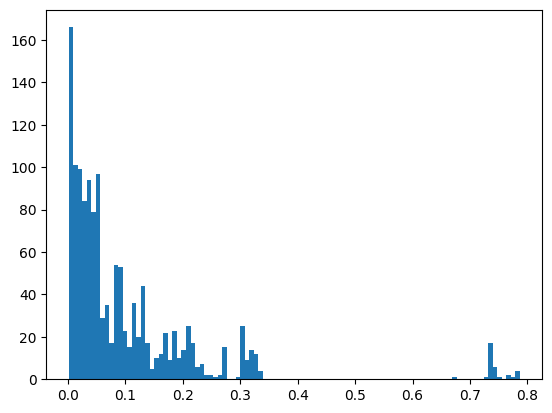

In [405]:
## histograma de la variable a predecir
plt.hist(df_full["riesgo"], bins=100)

C:\Users\pedro\AppData\Local\Temp\ipykernel_22420\960435501.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_full.corr()[["riesgo"]], annot=True, fmt=".2f", cmap="coolwarm")


<Axes: >

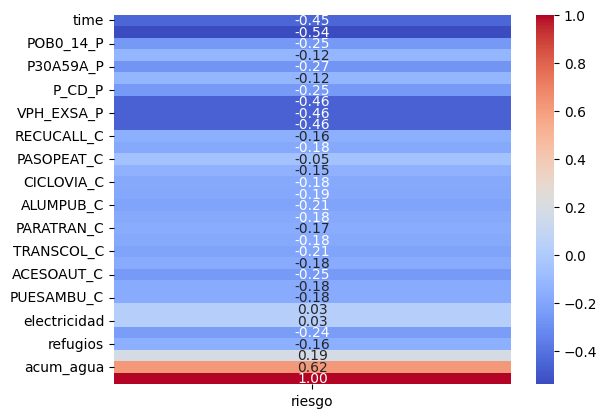

In [406]:

## print heatmap of correlation matrix
sns.heatmap(df_full.corr()[["riesgo"]], annot=True, fmt=".2f", cmap="coolwarm")


In [407]:
agebs_to_keep = df_full["CVE_AGEB"].unique()
df_full.drop(columns=["CVE_AGEB"], inplace=True)
df_full.dropna(inplace=True)
df_full

C:\Users\pedro\AppData\Local\Temp\ipykernel_22420\100393283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full.drop(columns=["CVE_AGEB"], inplace=True)
C:\Users\pedro\AppData\Local\Temp\ipykernel_22420\100393283.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full.dropna(inplace=True)


time    POBTOT  POB0_14_P  P15A29A_P  P30A59A_P   GRAPROES    P_CD_P  \
1239   3600  0.759857  10.981154  17.305000  27.587692   9.103462  2.170385   
1321   3600  2.746180  15.855957  21.856170  40.178511  13.274681  2.646170   
1567   3600  2.946036  15.588140  13.757209  34.650698  11.045116  1.448605   
1404   3900  5.245105  11.944318  22.513864  38.476364  13.536364  1.858182   
1322   3900  2.746180  15.855957  21.856170  40.178511  13.274681  2.646170   
...     ...       ...        ...        ...        ...        ...       ...   
161   24000  5.802664  11.647736  17.747170  30.118113  11.442453  7.085472   
1389  24000  2.746180  15.855957  21.856170  40.178511  13.274681  2.646170   
1143  24000  3.395927  10.822368  17.487105  32.854474  12.406842  2.937368   
1799  24000  2.751012  11.468462  19.808077  37.184615   9.587692  9.731923   
816   24000  2.153357   5.978372  14.797209  29.127209   9.612791  7.193721   

      VPH_C_EL_P  VPH_EXSA_P  VPH_DREN_P  ...  ACESOAUT_C  PUESSEMI_C  \
1239   61.538462   61.538462   61.538462  ...    0.007236    0.007330   
1321   91.489362   91.489362   91.489362  ...    0.001539    0.004114   
1567   74.418605   74.418605   74.418605  ...    0.006268    0.006268   
1404   90.782727   90.782727   90.782727  ...    0.005103    0.008317   
1322   91.489362   91.489362   91.489362  ...    0.001539    0.004114   
...          ...         ...         ...  ...         ...         ...   
161    88.486038   88.553396   88.553396  ...    0.008123    0.007919   
1389   91.489362   91.489362   91.489362  ...    0.001539    0.004114   
1143   84.064211   84.064211   84.064211  ...    0.006888    0.006949   
1799   91.141538   91.141538   91.141538  ...    0.006560    0.006392   
816    73.991163   74.127907   74.127907  ...    0.006805    0.006486   

      PUESAMBU_C      agua  electricidad   escuela  refugios     salud  \
1239    0.007236  0.000000      0.000000  0.000000  0.000000  0.051309   
1321    0.004114  0.000000      0.000000  0.001391  0.000000  0.001391   
1567    0.006268  0.002089      0.000000  0.004179  0.000000  0.018804   
1404    0.008191  0.000000      0.000000  0.005545  0.000000  0.041584   
1322    0.004114  0.000000      0.000000  0.001391  0.000000  0.001391   
...          ...       ...           ...       ...       ...       ...   
161     0.007714  0.000000      0.000000  0.013539  0.000000  0.037908   
1389    0.004114  0.000000      0.000000  0.001391  0.000000  0.001391   
1143    0.006949  0.002316      0.000000  0.002316  0.002316  0.006949   
1799    0.006308  0.000000      0.008747  0.006560  0.000000  0.002187   
816     0.005901  0.002286      0.000000  0.025145  0.000000  0.057149   

       acum_agua    riesgo  
1239  100.561193  0.323348  
1321  299.056540  0.151498  
1567   86.248337  0.061169  
1404  236.519855  0.125010  
1322  458.785886  0.232414  
...          ...       ...  
161    30.299549  0.014139  
1389  103.579724  0.052472  
1143   27.452734  0.018726  
1799  123.487635  0.098162  
816    52.077113  0.055284  

[1343 rows x 32 columns]

In [408]:
print(df_full.shape, "df_full")
print(df_proceso.shape, "df_proceso")
print(df_visual.shape, "df_visual")

(1343, 32) df_full
(1343, 37) df_proceso
(2128, 37) df_visual


In [409]:
# Dividimos los datos en características y variable objetivo
X = df_full.drop('riesgo', axis=1)
y = df_full['riesgo']

In [410]:
# Luego, normalizamos las características para que tengan una media de cero y una desviación estándar de uno:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Luego, normalizamos las características para que tengan una media de cero y una desviación estándar de uno:

In [411]:

# Normalizamos las características
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train_norm = (X_train - mean) / std
X_test_norm = (X_test - mean) / std


Ahora, construimos la red neuronal utilizando la API secuencial de Keras de TensorFlow:

In [412]:

# Construimos la red neuronal

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_norm.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])


La red neuronal tiene dos capas ocultas de 64 neuronas cada una con una función de activación ReLU y una capa de salida con una neurona sin función de activación.

Finalmente, compilamos y entrenamos la red neuronal con los datos de entrenamiento:

In [413]:
X_train_norm

time    POBTOT  POB0_14_P  P15A29A_P  P30A59A_P  GRAPROES    P_CD_P  \
1364  0.269553 -0.750084   1.189742   1.565693   1.833192  1.730720 -1.113305   
142   0.593016  0.743399  -0.313650  -0.181308  -0.821212  0.447986  0.432959   
2042  1.509495  1.650728   1.052088  -1.083511  -0.095646 -0.957760 -0.447706   
485   1.401674 -0.415419  -1.146956  -0.574090  -1.244139  0.168046  0.718605   
1209  0.754748 -1.476000  -0.741685  -1.098630  -1.716527 -0.863189 -1.415561   
...        ...       ...        ...        ...        ...       ...       ...   
1461  1.078211  0.470960  -0.207696   1.845321   1.384086  1.913923 -1.387772   
888   1.132121 -0.087036   0.069162   0.721447   1.160839  0.298416  0.098664   
241   1.509495 -0.810362  -0.950158  -0.484097  -0.016745  0.777340 -0.520207   
1779  0.539105 -0.747723  -0.377696   0.694917   1.043263 -0.850522  1.354752   
643   1.132121  1.150149   1.125893   0.764665   1.110982 -0.500200  1.589230   

      VPH_C_EL_P  VPH_EXSA_P  VPH_DREN_P  ...  ARBOLES_C  ACESOAUT_C  \
1364    0.603451    0.601429    0.596557  ...  -1.640895   -2.042529   
142     0.313638    0.318872    0.314322  ...  -0.290273    0.411989   
2042   -0.536745   -0.535722   -0.558681  ...   2.865921    2.513681   
485    -0.418432   -0.417725   -0.421437  ...   0.747935    0.917117   
1209   -2.084290   -2.079134   -2.080955  ...  -0.375780   -0.370486   
...          ...         ...         ...  ...        ...         ...   
1461    0.535263    0.533422    0.528628  ...  -0.034192   -0.713761   
888     1.164807    1.099966    1.102424  ...   0.046194   -0.579298   
241    -0.352879   -0.352347   -0.356134  ...   0.101997   -1.532670   
1779    0.569887    0.567954    0.563121  ...   0.328287   -0.170602   
643     0.967350    0.997302    0.991979  ...  -1.387395   -0.968294   

      PUESSEMI_C  PUESAMBU_C      agua  electricidad   escuela  refugios  \
1364   -1.506708   -1.447238 -0.554787     -0.282953 -1.154232 -0.321276   
142     0.233964    0.186097 -0.554787     -0.282953  0.170427 -0.321276   
2042    3.116692    2.929220 -0.554787     -0.282953  0.244670 -0.321276   
485     0.840321    0.826987 -0.554787     -0.282953  1.794786 -0.321276   
1209   -0.557338   -0.505843 -0.554787     -0.282953 -1.080959 -0.321276   
...          ...         ...       ...           ...       ...       ...   
1461    0.416030    0.402178 -0.554787     -0.282953 -0.701319 -0.321276   
888    -0.929446   -0.934801 -0.554787      0.708128 -0.095004 -0.321276   
241    -0.191579   -0.199276  1.823048     -0.282953  0.488055 -0.321276   
1779   -0.464503   -0.451947 -0.554787      4.401194 -0.590533 -0.321276   
643    -1.351766   -1.337516 -0.554787     -0.282953 -0.644410 -0.321276   

         salud  acum_agua  
1364 -1.004356  -0.076328  
142   0.425701  -0.822262  
2042 -0.687600  -1.030687  
485   1.663129   0.116606  
1209  2.172927  -0.832896  
...        ...        ...  
1461  0.569642  -0.614991  
888  -0.116618  -0.400225  
241  -0.966799   0.170628  
1779 -0.973197   0.053059  
643  -0.821269  -0.603750  

[1074 rows x 31 columns]

In [414]:
# Compilamos y entrenamos la red neuronal
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(X_train_norm, y_train, epochs=100, batch_size=16, validation_split=0.2)



Epoch 1/100
54/54 [==============================] - 0s 2ms/step - loss: 0.0226 - mae: 0.1018 - val_loss: 0.0139 - val_mae: 0.1029
Epoch 2/100
54/54 [==============================] - 0s 2ms/step - loss: 0.0076 - mae: 0.0598 - val_loss: 0.0012 - val_mae: 0.0268
Epoch 3/100
54/54 [==============================] - 0s 1ms/step - loss: 0.0067 - mae: 0.0550 - val_loss: 0.0068 - val_mae: 0.0588
Epoch 4/100
54/54 [==============================] - 0s 1ms/step - loss: 0.0051 - mae: 0.0451 - val_loss: 0.0176 - val_mae: 0.1068
Epoch 5/100
54/54 [==============================] - 0s 1ms/step - loss: 0.0059 - mae: 0.0501 - val_loss: 0.0071 - val_mae: 0.0642
Epoch 6/100
54/54 [==============================] - 0s 1ms/step - loss: 0.0045 - mae: 0.0450 - val_loss: 0.0050 - val_mae: 0.0481
Epoch 7/100
54/54 [==============================] - 0s 1ms/step - loss: 0.0045 - mae: 0.0470 - val_loss: 0.0104 - val_mae: 0.0799
Epoch 8/100
54/54 [==============================] - 0s 1ms/step - loss: 0.0036 - m

En este ejemplo, estamos utilizando el optimizador RMSprop y la función de pérdida MSE (mean squared error) con una métrica adicional de MAE (mean absolute error). Además, estamos entrenando la red durante 100 épocas con un tamaño de lote de 16 y una validación del 20%.

Finalmente, podemos evaluar el rendimiento del modelo con los datos de prueba y ver las predicciones para algunos ejemplos:

In [415]:
# save model
model.save('model2.h5')

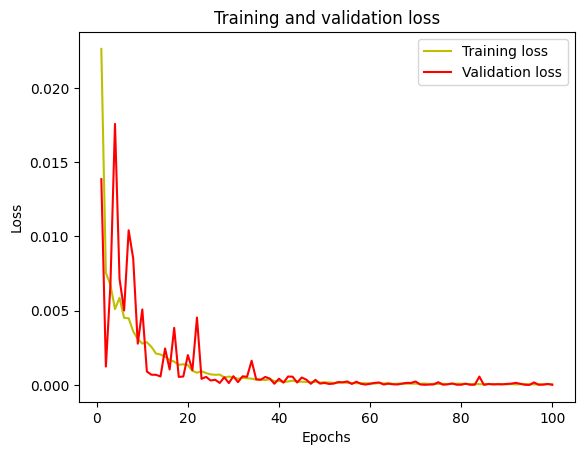

In [416]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("training_validation.png", dpi = 300)
plt.show()


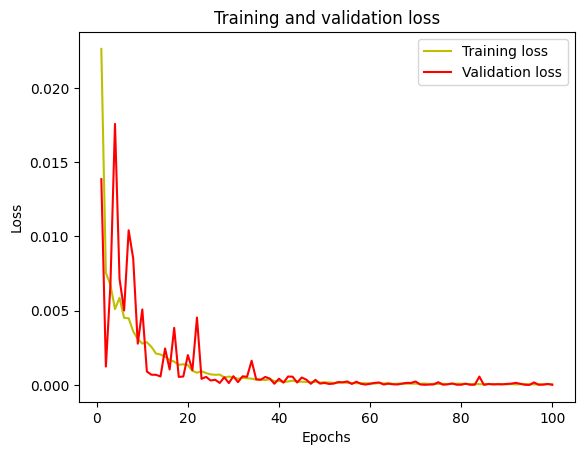

In [417]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("training_validation.png", dpi = 300)
plt.show()

In [418]:
# Evaluamos el rendimiento del modelo
mse, mae = model.evaluate(X_test_norm, y_test)

# Hacemos algunas predicciones
X_new = X_test_norm[:3]
y_pred = model.predict(X_new)

print('Mean squared error:', mse)
print('Mean absolute error:', mae)
print('Predictions:', y_pred.flatten())


1/1 [==============================] - 0s 31ms/step
Mean squared error: 1.4138139704300556e-05
Mean absolute error: 0.002748341066762805
Predictions: [0.03689677 0.72509277 0.31980056]


In [419]:
X_test_norm

time    POBTOT  POB0_14_P  P15A29A_P  P30A59A_P  GRAPROES    P_CD_P  \
875   0.431284 -0.087036   0.069162   0.721447   1.160839  0.298416  0.098664   
1273 -0.215642 -1.720657  -0.551787  -0.369303  -1.488855 -1.189530 -1.279028   
199  -0.754748 -0.810362  -0.950158  -0.484097  -0.016745  0.777340 -0.520207   
1594 -0.593016 -0.652429   1.094063  -1.877698   0.374696  0.169813 -1.530433   
470   0.593016 -0.415419  -1.146956  -0.574090  -1.244139  0.168046  0.718605   
...        ...       ...        ...        ...        ...       ...       ...   
185  -1.509495 -0.810362  -0.950158  -0.484097  -0.016745  0.777340 -0.520207   
1674 -0.700837  0.326363   0.115319   0.374155   0.922514  0.842990  1.394296   
811   1.347764 -1.039754  -2.339036  -1.435526  -1.082659 -0.832951  0.470664   
547   0.377374  0.796940  -0.145879   1.357115   0.607784  0.119901  1.432247   
46   -0.215642  0.664218  -0.403029  -0.257068  -0.486921 -0.328122  0.518132   

      VPH_C_EL_P  VPH_EXSA_P  VPH_DREN_P  ...  ARBOLES_C  ACESOAUT_C  \
875     1.164807    1.099966    1.102424  ...   0.046194   -0.579298   
1273   -2.286736   -2.281039   -2.282630  ...  -0.658882    0.081186   
199    -0.352879   -0.352347   -0.356134  ...   0.101997   -1.532670   
1594   -1.043834   -1.041457   -1.044459  ...  -1.104446   -0.279564   
470    -0.418432   -0.417725   -0.421437  ...   0.747935    0.917117   
...          ...         ...         ...  ...        ...         ...   
185    -0.352879   -0.352347   -0.356134  ...   0.101997   -1.532670   
1674    1.384178    1.389781    1.384012  ...   0.663232    0.186425   
811    -1.085081   -1.069434   -1.072404  ...   0.811995   -0.079557   
547     0.833376    0.830739    0.836916  ...   0.087700    0.047745   
46      0.006567    0.022500    0.018287  ...   0.693005    0.593910   

      PUESSEMI_C  PUESAMBU_C      agua  electricidad   escuela  refugios  \
875    -0.929446   -0.934801 -0.554787      0.708128 -0.095004 -0.321276   
1273   -0.035529   -0.031052 -0.554787     -0.282953 -1.305937 -0.321276   
199    -0.191579   -0.199276  1.823048     -0.282953  0.488055 -0.321276   
1594   -0.521266   -0.470074  1.559171     -0.282953 -0.850250 -0.321276   
470     0.840321    0.826987 -0.554787     -0.282953  1.794786 -0.321276   
...          ...         ...       ...           ...       ...       ...   
185    -0.191579   -0.199276  1.823048     -0.282953  0.488055 -0.321276   
1674    0.121556    0.097020  2.033007     -0.282953 -1.027023 -0.321276   
811    -0.421739   -0.636687  1.758037     -0.282953  1.436117 -0.321276   
547    -0.119567   -0.167105 -0.554787      0.992630  0.772124 -0.321276   
46      0.605451    0.565786 -0.554787     -0.282953  0.611254 -0.321276   

         salud  acum_agua  
875  -0.116618  -0.362096  
1273  0.950482   0.888865  
199  -0.966799   2.063989  
1594 -0.322427  -0.011428  
470   1.663129   0.143891  
...        ...        ...  
185  -0.966799   2.079918  
1674 -0.257527   0.402841  
811   1.179178  -0.645239  
547   0.153858  -0.727792  
46    0.777168  -0.298666  

[269 rows x 31 columns]

In [420]:
X_new

time    POBTOT  POB0_14_P  P15A29A_P  P30A59A_P  GRAPROES    P_CD_P  \
875   0.431284 -0.087036   0.069162   0.721447   1.160839  0.298416  0.098664   
1273 -0.215642 -1.720657  -0.551787  -0.369303  -1.488855 -1.189530 -1.279028   
199  -0.754748 -0.810362  -0.950158  -0.484097  -0.016745  0.777340 -0.520207   

      VPH_C_EL_P  VPH_EXSA_P  VPH_DREN_P  ...  ARBOLES_C  ACESOAUT_C  \
875     1.164807    1.099966    1.102424  ...   0.046194   -0.579298   
1273   -2.286736   -2.281039   -2.282630  ...  -0.658882    0.081186   
199    -0.352879   -0.352347   -0.356134  ...   0.101997   -1.532670   

      PUESSEMI_C  PUESAMBU_C      agua  electricidad   escuela  refugios  \
875    -0.929446   -0.934801 -0.554787      0.708128 -0.095004 -0.321276   
1273   -0.035529   -0.031052 -0.554787     -0.282953 -1.305937 -0.321276   
199    -0.191579   -0.199276  1.823048     -0.282953  0.488055 -0.321276   

         salud  acum_agua  
875  -0.116618  -0.362096  
1273  0.950482   0.888865  
199  -0.966799   2.063989  

[3 rows x 31 columns]

# Proceso

In [421]:
columnas = X_new.columns
columnas[:5]

Index(['time', 'POBTOT', 'POB0_14_P', 'P15A29A_P', 'P30A59A_P'], dtype='object')

In [422]:
columnas

Index(['time', 'POBTOT', 'POB0_14_P', 'P15A29A_P', 'P30A59A_P', 'GRAPROES',
       'P_CD_P', 'VPH_C_EL_P', 'VPH_EXSA_P', 'VPH_DREN_P', 'RECUCALL_C',
       'RAMPAS_C', 'PASOPEAT_C', 'BANQUETA_C', 'CICLOVIA_C', 'CICLOCAR_C',
       'ALUMPUB_C', 'SEMAAUDI_C', 'PARATRAN_C', 'DRENAJEP_C', 'TRANSCOL_C',
       'ARBOLES_C', 'ACESOAUT_C', 'PUESSEMI_C', 'PUESAMBU_C', 'agua',
       'electricidad', 'escuela', 'refugios', 'salud', 'acum_agua'],
      dtype='object')

In [423]:
df_full

time    POBTOT  POB0_14_P  P15A29A_P  P30A59A_P   GRAPROES    P_CD_P  \
1239   3600  0.759857  10.981154  17.305000  27.587692   9.103462  2.170385   
1321   3600  2.746180  15.855957  21.856170  40.178511  13.274681  2.646170   
1567   3600  2.946036  15.588140  13.757209  34.650698  11.045116  1.448605   
1404   3900  5.245105  11.944318  22.513864  38.476364  13.536364  1.858182   
1322   3900  2.746180  15.855957  21.856170  40.178511  13.274681  2.646170   
...     ...       ...        ...        ...        ...        ...       ...   
161   24000  5.802664  11.647736  17.747170  30.118113  11.442453  7.085472   
1389  24000  2.746180  15.855957  21.856170  40.178511  13.274681  2.646170   
1143  24000  3.395927  10.822368  17.487105  32.854474  12.406842  2.937368   
1799  24000  2.751012  11.468462  19.808077  37.184615   9.587692  9.731923   
816   24000  2.153357   5.978372  14.797209  29.127209   9.612791  7.193721   

      VPH_C_EL_P  VPH_EXSA_P  VPH_DREN_P  ...  ACESOAUT_C  PUESSEMI_C  \
1239   61.538462   61.538462   61.538462  ...    0.007236    0.007330   
1321   91.489362   91.489362   91.489362  ...    0.001539    0.004114   
1567   74.418605   74.418605   74.418605  ...    0.006268    0.006268   
1404   90.782727   90.782727   90.782727  ...    0.005103    0.008317   
1322   91.489362   91.489362   91.489362  ...    0.001539    0.004114   
...          ...         ...         ...  ...         ...         ...   
161    88.486038   88.553396   88.553396  ...    0.008123    0.007919   
1389   91.489362   91.489362   91.489362  ...    0.001539    0.004114   
1143   84.064211   84.064211   84.064211  ...    0.006888    0.006949   
1799   91.141538   91.141538   91.141538  ...    0.006560    0.006392   
816    73.991163   74.127907   74.127907  ...    0.006805    0.006486   

      PUESAMBU_C      agua  electricidad   escuela  refugios     salud  \
1239    0.007236  0.000000      0.000000  0.000000  0.000000  0.051309   
1321    0.004114  0.000000      0.000000  0.001391  0.000000  0.001391   
1567    0.006268  0.002089      0.000000  0.004179  0.000000  0.018804   
1404    0.008191  0.000000      0.000000  0.005545  0.000000  0.041584   
1322    0.004114  0.000000      0.000000  0.001391  0.000000  0.001391   
...          ...       ...           ...       ...       ...       ...   
161     0.007714  0.000000      0.000000  0.013539  0.000000  0.037908   
1389    0.004114  0.000000      0.000000  0.001391  0.000000  0.001391   
1143    0.006949  0.002316      0.000000  0.002316  0.002316  0.006949   
1799    0.006308  0.000000      0.008747  0.006560  0.000000  0.002187   
816     0.005901  0.002286      0.000000  0.025145  0.000000  0.057149   

       acum_agua    riesgo  
1239  100.561193  0.323348  
1321  299.056540  0.151498  
1567   86.248337  0.061169  
1404  236.519855  0.125010  
1322  458.785886  0.232414  
...          ...       ...  
161    30.299549  0.014139  
1389  103.579724  0.052472  
1143   27.452734  0.018726  
1799  123.487635  0.098162  
816    52.077113  0.055284  

[1343 rows x 32 columns]

In [424]:
df_modelo = df_full[columnas]

# Normalizamos las características
mean = df_modelo.mean(axis=0)
std = df_modelo.std(axis=0)
X_train_norm = (df_modelo - mean) / std



X_train_norm

time    POBTOT  POB0_14_P  P15A29A_P  P30A59A_P  GRAPROES    P_CD_P  \
1239 -2.053266 -1.721861  -0.539004  -0.367164  -1.488142 -1.213622 -1.273689   
1321 -2.053266 -0.739578   1.204887   1.556829   1.817826  1.727110 -1.107090   
1567 -2.053266 -0.640744   1.109079  -1.866980   0.366390  0.155255 -1.526425   
1404 -1.999270  0.496200  -0.194445   1.834866   1.370894  1.911598 -1.383009   
1322 -1.999270 -0.739578   1.204887   1.556829   1.817826  1.727110 -1.107090   
...        ...       ...        ...        ...        ...       ...       ...   
161   1.618409  0.771926  -0.300543  -0.180238  -0.823730  0.435380  0.447356   
1389  1.618409 -0.739578   1.204887   1.556829   1.817826  1.727110 -1.107090   
1143  1.618409 -0.418263  -0.595807  -0.290179  -0.105244  1.115279 -1.005126   
1799  1.618409 -0.737188  -0.364676   0.691004   1.031720 -0.872236  1.374026   
816   1.618409 -1.032743  -2.328677  -1.427324  -1.083911 -0.854542  0.485260   

      VPH_C_EL_P  VPH_EXSA_P  VPH_DREN_P  ...  ARBOLES_C  ACESOAUT_C  \
1239   -2.265264   -2.261110   -2.262377  ...  -0.662840    0.098933   
1321    0.600859    0.599900    0.595336  ...  -1.655773   -2.035111   
1567   -1.032711   -1.030756   -1.033441  ...  -1.113359   -0.263572   
1404    0.533238    0.532400    0.527913  ...  -0.031204   -0.699880   
1322    0.600859    0.599900    0.595336  ...  -1.655773   -2.035111   
...          ...         ...         ...  ...        ...         ...   
161     0.313459    0.319447    0.315206  ...  -0.290133    0.431345   
1389    0.600859    0.599900    0.595336  ...  -1.655773   -2.035111   
1143   -0.109684   -0.109375   -0.113122  ...  -1.039194   -0.031218   
1799    0.567574    0.566675    0.562149  ...   0.335305   -0.154079   
816    -1.073615   -1.058524   -1.061177  ...   0.824392   -0.062592   

      PUESSEMI_C  PUESAMBU_C      agua  electricidad   escuela  refugios  \
1239   -0.024293   -0.017251 -0.558698     -0.287405 -1.307728 -0.317484   
1321   -1.509078   -1.451887 -0.558698     -0.287405 -1.155950 -0.317484   
1567   -0.514522   -0.461993  1.550582     -0.287405 -0.851821 -0.317484   
1404    0.431442    0.421623 -0.558698     -0.287405 -0.702819 -0.317484   
1322   -1.509078   -1.451887 -0.558698     -0.287405 -1.155950 -0.317484   
...          ...         ...       ...           ...       ...       ...   
161     0.247692    0.202727 -0.558698     -0.287405  0.169345 -0.317484   
1389   -1.509078   -1.451887 -0.558698     -0.287405 -1.155950 -0.317484   
1143   -0.199966   -0.148911  1.779814     -0.287405 -1.055001  2.567562   
1799   -0.457234   -0.443629 -0.558698      4.434570 -0.591980 -0.317484   
816    -0.414074   -0.630777  1.749008     -0.287405  1.435642 -0.317484   

         salud  acum_agua  
1239  0.965035  -0.213899  
1321 -1.011066   1.561943  
1567 -0.321720  -0.341949  
1404  0.580054   1.002457  
1322 -1.011066   2.990964  
...        ...        ...  
161   0.434546  -0.842496  
1389 -1.011066  -0.186894  
1143 -0.791032  -0.867965  
1799 -0.979569  -0.008787  
816   1.196219  -0.647663  

[1343 rows x 31 columns]

In [425]:
X_train_norm

time    POBTOT  POB0_14_P  P15A29A_P  P30A59A_P  GRAPROES    P_CD_P  \
1239 -2.053266 -1.721861  -0.539004  -0.367164  -1.488142 -1.213622 -1.273689   
1321 -2.053266 -0.739578   1.204887   1.556829   1.817826  1.727110 -1.107090   
1567 -2.053266 -0.640744   1.109079  -1.866980   0.366390  0.155255 -1.526425   
1404 -1.999270  0.496200  -0.194445   1.834866   1.370894  1.911598 -1.383009   
1322 -1.999270 -0.739578   1.204887   1.556829   1.817826  1.727110 -1.107090   
...        ...       ...        ...        ...        ...       ...       ...   
161   1.618409  0.771926  -0.300543  -0.180238  -0.823730  0.435380  0.447356   
1389  1.618409 -0.739578   1.204887   1.556829   1.817826  1.727110 -1.107090   
1143  1.618409 -0.418263  -0.595807  -0.290179  -0.105244  1.115279 -1.005126   
1799  1.618409 -0.737188  -0.364676   0.691004   1.031720 -0.872236  1.374026   
816   1.618409 -1.032743  -2.328677  -1.427324  -1.083911 -0.854542  0.485260   

      VPH_C_EL_P  VPH_EXSA_P  VPH_DREN_P  ...  ARBOLES_C  ACESOAUT_C  \
1239   -2.265264   -2.261110   -2.262377  ...  -0.662840    0.098933   
1321    0.600859    0.599900    0.595336  ...  -1.655773   -2.035111   
1567   -1.032711   -1.030756   -1.033441  ...  -1.113359   -0.263572   
1404    0.533238    0.532400    0.527913  ...  -0.031204   -0.699880   
1322    0.600859    0.599900    0.595336  ...  -1.655773   -2.035111   
...          ...         ...         ...  ...        ...         ...   
161     0.313459    0.319447    0.315206  ...  -0.290133    0.431345   
1389    0.600859    0.599900    0.595336  ...  -1.655773   -2.035111   
1143   -0.109684   -0.109375   -0.113122  ...  -1.039194   -0.031218   
1799    0.567574    0.566675    0.562149  ...   0.335305   -0.154079   
816    -1.073615   -1.058524   -1.061177  ...   0.824392   -0.062592   

      PUESSEMI_C  PUESAMBU_C      agua  electricidad   escuela  refugios  \
1239   -0.024293   -0.017251 -0.558698     -0.287405 -1.307728 -0.317484   
1321   -1.509078   -1.451887 -0.558698     -0.287405 -1.155950 -0.317484   
1567   -0.514522   -0.461993  1.550582     -0.287405 -0.851821 -0.317484   
1404    0.431442    0.421623 -0.558698     -0.287405 -0.702819 -0.317484   
1322   -1.509078   -1.451887 -0.558698     -0.287405 -1.155950 -0.317484   
...          ...         ...       ...           ...       ...       ...   
161     0.247692    0.202727 -0.558698     -0.287405  0.169345 -0.317484   
1389   -1.509078   -1.451887 -0.558698     -0.287405 -1.155950 -0.317484   
1143   -0.199966   -0.148911  1.779814     -0.287405 -1.055001  2.567562   
1799   -0.457234   -0.443629 -0.558698      4.434570 -0.591980 -0.317484   
816    -0.414074   -0.630777  1.749008     -0.287405  1.435642 -0.317484   

         salud  acum_agua  
1239  0.965035  -0.213899  
1321 -1.011066   1.561943  
1567 -0.321720  -0.341949  
1404  0.580054   1.002457  
1322 -1.011066   2.990964  
...        ...        ...  
161   0.434546  -0.842496  
1389 -1.011066  -0.186894  
1143 -0.791032  -0.867965  
1799 -0.979569  -0.008787  
816   1.196219  -0.647663  

[1343 rows x 31 columns]

In [426]:
y_pred = model.predict(X_train_norm)
len(y_pred)

42/42 [==============================] - 0s 444us/step


1343

In [427]:
print(df_full.shape, "df_full")
print(df_proceso.shape, "df_proceso")
print(df_visual.shape, "df_visual")

(1343, 32) df_full
(1343, 37) df_proceso
(2128, 37) df_visual


In [428]:
agebs_to_keep

array(['1053', '1068', '1227', '1072', '0835', '0924', '0411', '0318',
       '0676', '0708', '0727', '1265', '0731', '127A', '0746', '0680',
       '0750', '0801', '0322', '1528', '1458', '077A', '0712'],
      dtype=object)

In [429]:
df_proceso = df_proceso[df_proceso["CVE_AGEB"].isin(agebs_to_keep)].dropna(subset=["Depth"])
df_proceso

CVEGEO CVE_AGEB   time     Depth  Rain  Velocity        area  \
1239  0600200011053     1053   3600  0.245698   0.0  1.922391  409.287378   
1321  0600200011068     1068   3600  0.416040   0.0  2.214135  718.816563   
1567  0600200011227     1227   3600  0.180206   0.0  0.377539  478.609244   
1404  0600200011072     1072   3900  0.655693   0.0  2.369761  360.717244   
1322  0600200011068     1068   3900  0.638252   0.0  2.210387  718.816563   
...             ...      ...    ...       ...   ...       ...         ...   
161   0600200010322     0322  24000  0.082043   7.8  0.151941  369.313118   
1389  0600200011068     1068  24000  0.144098   7.8  0.522681  718.816563   
1143  0600200010835     0835  24000  0.063593   7.8  0.282199  431.693665   
1799  060020001127A     127A  24000  0.270045   7.8  0.880352  457.286220   
816   0600200010746     0746  24000  0.119045   7.8  0.171652  437.456542   

      POBTOT  POB0_14_P  P15A29A_P  ...  ARBOLES_C  ACESOAUT_C  PUESSEMI_C  \
1239     311  10.981154  17.305000  ...   1.269231    2.961538    3.000000   
1321    1974  15.855957  21.856170  ...   1.319149    1.106383    2.957447   
1567    1410  15.588140  13.757209  ...   1.209302    3.000000    3.000000   
1404    1892  11.944318  22.513864  ...   1.409091    1.840909    3.000000   
1322    1974  15.855957  21.856170  ...   1.319149    1.106383    2.957447   
...      ...        ...        ...  ...        ...         ...         ...   
161     2143  11.647736  17.747170  ...   1.320755    3.000000    2.924528   
1389    1974  15.855957  21.856170  ...   1.319149    1.106383    2.957447   
1143    1466  10.822368  17.487105  ...   1.131579    2.973684    3.000000   
1799    1258  11.468462  19.808077  ...   2.000000    3.000000    2.923077   
816      942   5.978372  14.797209  ...   2.186047    2.976744    2.837209   

      PUESAMBU_C  agua  electricidad  escuela  refugios  salud   acum_agua  
1239    2.961538   0.0           0.0      0.0       0.0   21.0  100.561193  
1321    2.957447   0.0           0.0      1.0       0.0    1.0  299.056540  
1567    3.000000   1.0           0.0      2.0       0.0    9.0   86.248337  
1404    2.954545   0.0           0.0      2.0       0.0   15.0  236.519855  
1322    2.957447   0.0           0.0      1.0       0.0    1.0  458.785886  
...          ...   ...           ...      ...       ...    ...         ...  
161     2.849057   0.0           0.0      5.0       0.0   14.0   30.299549  
1389    2.957447   0.0           0.0      1.0       0.0    1.0  103.579724  
1143    3.000000   1.0           0.0      1.0       1.0    3.0   27.452734  
1799    2.884615   0.0           4.0      3.0       0.0    1.0  123.487635  
816     2.581395   1.0           0.0     11.0       0.0   25.0   52.077113  

[1343 rows x 37 columns]

In [430]:
print(df_full.shape, "df_full")
print(df_proceso.shape, "df_proceso")
print(df_visual.shape, "df_visual")

(1343, 32) df_full
(1343, 37) df_proceso
(2128, 37) df_visual


In [431]:
y_pred

array([[0.3274056 ],
       [0.14688635],
       [0.06324698],
       ...,
       [0.02099491],
       [0.09830355],
       [0.04867922]], dtype=float32)

In [432]:
df_proceso.dropna(inplace=True)

In [433]:
df_full

time    POBTOT  POB0_14_P  P15A29A_P  P30A59A_P   GRAPROES    P_CD_P  \
1239   3600  0.759857  10.981154  17.305000  27.587692   9.103462  2.170385   
1321   3600  2.746180  15.855957  21.856170  40.178511  13.274681  2.646170   
1567   3600  2.946036  15.588140  13.757209  34.650698  11.045116  1.448605   
1404   3900  5.245105  11.944318  22.513864  38.476364  13.536364  1.858182   
1322   3900  2.746180  15.855957  21.856170  40.178511  13.274681  2.646170   
...     ...       ...        ...        ...        ...        ...       ...   
161   24000  5.802664  11.647736  17.747170  30.118113  11.442453  7.085472   
1389  24000  2.746180  15.855957  21.856170  40.178511  13.274681  2.646170   
1143  24000  3.395927  10.822368  17.487105  32.854474  12.406842  2.937368   
1799  24000  2.751012  11.468462  19.808077  37.184615   9.587692  9.731923   
816   24000  2.153357   5.978372  14.797209  29.127209   9.612791  7.193721   

      VPH_C_EL_P  VPH_EXSA_P  VPH_DREN_P  ...  ACESOAUT_C  PUESSEMI_C  \
1239   61.538462   61.538462   61.538462  ...    0.007236    0.007330   
1321   91.489362   91.489362   91.489362  ...    0.001539    0.004114   
1567   74.418605   74.418605   74.418605  ...    0.006268    0.006268   
1404   90.782727   90.782727   90.782727  ...    0.005103    0.008317   
1322   91.489362   91.489362   91.489362  ...    0.001539    0.004114   
...          ...         ...         ...  ...         ...         ...   
161    88.486038   88.553396   88.553396  ...    0.008123    0.007919   
1389   91.489362   91.489362   91.489362  ...    0.001539    0.004114   
1143   84.064211   84.064211   84.064211  ...    0.006888    0.006949   
1799   91.141538   91.141538   91.141538  ...    0.006560    0.006392   
816    73.991163   74.127907   74.127907  ...    0.006805    0.006486   

      PUESAMBU_C      agua  electricidad   escuela  refugios     salud  \
1239    0.007236  0.000000      0.000000  0.000000  0.000000  0.051309   
1321    0.004114  0.000000      0.000000  0.001391  0.000000  0.001391   
1567    0.006268  0.002089      0.000000  0.004179  0.000000  0.018804   
1404    0.008191  0.000000      0.000000  0.005545  0.000000  0.041584   
1322    0.004114  0.000000      0.000000  0.001391  0.000000  0.001391   
...          ...       ...           ...       ...       ...       ...   
161     0.007714  0.000000      0.000000  0.013539  0.000000  0.037908   
1389    0.004114  0.000000      0.000000  0.001391  0.000000  0.001391   
1143    0.006949  0.002316      0.000000  0.002316  0.002316  0.006949   
1799    0.006308  0.000000      0.008747  0.006560  0.000000  0.002187   
816     0.005901  0.002286      0.000000  0.025145  0.000000  0.057149   

       acum_agua    riesgo  
1239  100.561193  0.323348  
1321  299.056540  0.151498  
1567   86.248337  0.061169  
1404  236.519855  0.125010  
1322  458.785886  0.232414  
...          ...       ...  
161    30.299549  0.014139  
1389  103.579724  0.052472  
1143   27.452734  0.018726  
1799  123.487635  0.098162  
816    52.077113  0.055284  

[1343 rows x 32 columns]

In [434]:
df_proceso

CVEGEO CVE_AGEB   time     Depth  Rain  Velocity        area  \
1239  0600200011053     1053   3600  0.245698   0.0  1.922391  409.287378   
1321  0600200011068     1068   3600  0.416040   0.0  2.214135  718.816563   
1567  0600200011227     1227   3600  0.180206   0.0  0.377539  478.609244   
1404  0600200011072     1072   3900  0.655693   0.0  2.369761  360.717244   
1322  0600200011068     1068   3900  0.638252   0.0  2.210387  718.816563   
...             ...      ...    ...       ...   ...       ...         ...   
161   0600200010322     0322  24000  0.082043   7.8  0.151941  369.313118   
1389  0600200011068     1068  24000  0.144098   7.8  0.522681  718.816563   
1143  0600200010835     0835  24000  0.063593   7.8  0.282199  431.693665   
1799  060020001127A     127A  24000  0.270045   7.8  0.880352  457.286220   
816   0600200010746     0746  24000  0.119045   7.8  0.171652  437.456542   

      POBTOT  POB0_14_P  P15A29A_P  ...  ARBOLES_C  ACESOAUT_C  PUESSEMI_C  \
1239     311  10.981154  17.305000  ...   1.269231    2.961538    3.000000   
1321    1974  15.855957  21.856170  ...   1.319149    1.106383    2.957447   
1567    1410  15.588140  13.757209  ...   1.209302    3.000000    3.000000   
1404    1892  11.944318  22.513864  ...   1.409091    1.840909    3.000000   
1322    1974  15.855957  21.856170  ...   1.319149    1.106383    2.957447   
...      ...        ...        ...  ...        ...         ...         ...   
161     2143  11.647736  17.747170  ...   1.320755    3.000000    2.924528   
1389    1974  15.855957  21.856170  ...   1.319149    1.106383    2.957447   
1143    1466  10.822368  17.487105  ...   1.131579    2.973684    3.000000   
1799    1258  11.468462  19.808077  ...   2.000000    3.000000    2.923077   
816      942   5.978372  14.797209  ...   2.186047    2.976744    2.837209   

      PUESAMBU_C  agua  electricidad  escuela  refugios  salud   acum_agua  
1239    2.961538   0.0           0.0      0.0       0.0   21.0  100.561193  
1321    2.957447   0.0           0.0      1.0       0.0    1.0  299.056540  
1567    3.000000   1.0           0.0      2.0       0.0    9.0   86.248337  
1404    2.954545   0.0           0.0      2.0       0.0   15.0  236.519855  
1322    2.957447   0.0           0.0      1.0       0.0    1.0  458.785886  
...          ...   ...           ...      ...       ...    ...         ...  
161     2.849057   0.0           0.0      5.0       0.0   14.0   30.299549  
1389    2.957447   0.0           0.0      1.0       0.0    1.0  103.579724  
1143    3.000000   1.0           0.0      1.0       1.0    3.0   27.452734  
1799    2.884615   0.0           4.0      3.0       0.0    1.0  123.487635  
816     2.581395   1.0           0.0     11.0       0.0   25.0   52.077113  

[1343 rows x 37 columns]

In [436]:
df_proceso["riesgo"] = y_pred
df_proceso.head()

CVEGEO CVE_AGEB  time     Depth  Rain  Velocity        area  \
1239  0600200011053     1053  3600  0.245698   0.0  1.922391  409.287378   
1321  0600200011068     1068  3600  0.416040   0.0  2.214135  718.816563   
1567  0600200011227     1227  3600  0.180206   0.0  0.377539  478.609244   
1404  0600200011072     1072  3900  0.655693   0.0  2.369761  360.717244   
1322  0600200011068     1068  3900  0.638252   0.0  2.210387  718.816563   

      POBTOT  POB0_14_P  P15A29A_P  ...  ACESOAUT_C  PUESSEMI_C  PUESAMBU_C  \
1239     311  10.981154  17.305000  ...    2.961538    3.000000    2.961538   
1321    1974  15.855957  21.856170  ...    1.106383    2.957447    2.957447   
1567    1410  15.588140  13.757209  ...    3.000000    3.000000    3.000000   
1404    1892  11.944318  22.513864  ...    1.840909    3.000000    2.954545   
1322    1974  15.855957  21.856170  ...    1.106383    2.957447    2.957447   

      agua  electricidad  escuela  refugios  salud   acum_agua    riesgo  
1239   0.0           0.0      0.0       0.0   21.0  100.561193  0.327406  
1321   0.0           0.0      1.0       0.0    1.0  299.056540  0.146886  
1567   1.0           0.0      2.0       0.0    9.0   86.248337  0.063247  
1404   0.0           0.0      2.0       0.0   15.0  236.519855  0.128255  
1322   0.0           0.0      1.0       0.0    1.0  458.785886  0.232711  

[5 rows x 38 columns]

In [437]:
agebs_proceso.drop(columns=["CVE_ENT","CVE_MUN","CVE_LOC","CVE_AGEB"], inplace=True)
agebs_proceso.head()

CVEGEO                                           geometry
24  0600200011640  MULTIPOLYGON (((635481.389 2132657.115, 635481...
29  0600200011617  MULTIPOLYGON (((632971.765 2126796.935, 632973...
30  0600200011621  MULTIPOLYGON (((633344.752 2126236.664, 633287...
31  0600200010676  MULTIPOLYGON (((634027.336 2129950.192, 634132...
32  0600200010727  MULTIPOLYGON (((633395.848 2129528.302, 633418...

In [438]:
df_proceso2 = gpd.GeoDataFrame(df_proceso.merge(agebs_proceso, on="CVEGEO"))
df_proceso2.head()

CVEGEO CVE_AGEB  time     Depth  Rain  Velocity        area  POBTOT  \
0  0600200011053     1053  3600  0.245698  0.00  1.922391  409.287378     311   
1  0600200011053     1053  3900  0.511827  0.00  1.654565  409.287378     311   
2  0600200011053     1053  4200  0.588490  0.96  1.657816  409.287378     311   
3  0600200011053     1053  4500  0.597594  0.96  1.701810  409.287378     311   
4  0600200011053     1053  4800  0.593713  2.28  1.713636  409.287378     311   

   POB0_14_P  P15A29A_P  ...  PUESSEMI_C  PUESAMBU_C  agua  electricidad  \
0  10.981154     17.305  ...         3.0    2.961538   0.0           0.0   
1  10.981154     17.305  ...         3.0    2.961538   0.0           0.0   
2  10.981154     17.305  ...         3.0    2.961538   0.0           0.0   
3  10.981154     17.305  ...         3.0    2.961538   0.0           0.0   
4  10.981154     17.305  ...         3.0    2.961538   0.0           0.0   

   escuela  refugios  salud   acum_agua    riesgo  \
0      0.0       0.0   21.0  100.561193  0.327406   
1      0.0       0.0   21.0  209.484442  0.686860   
2      0.0       0.0   21.0  240.861465  0.781310   
3      0.0       0.0   21.0  244.587798  0.788597   
4      0.0       0.0   21.0  242.999142  0.785150   

                                            geometry  
0  MULTIPOLYGON (((635416.703 2130820.629, 635424...  
1  MULTIPOLYGON (((635416.703 2130820.629, 635424...  
2  MULTIPOLYGON (((635416.703 2130820.629, 635424...  
3  MULTIPOLYGON (((635416.703 2130820.629, 635424...  
4  MULTIPOLYGON (((635416.703 2130820.629, 635424...  

[5 rows x 39 columns]

In [439]:
df_visual2 = df_visual.merge(df_proceso2[["CVEGEO","time","riesgo"]], on=["CVEGEO","time"], how="left")
df_visual2

CVEGEO CVE_AGEB   time     Depth  Rain  Velocity        area  \
0     0600200010318     0318      0       NaN   0.0       NaN  341.274721   
1     0600200010676     0676      0       NaN   0.0       NaN  383.927539   
2     0600200010680     0680      0       NaN   0.0       NaN  316.683715   
3     0600200010708     0708      0       NaN   0.0       NaN  316.517587   
4     0600200010712     0712      0       NaN   0.0       NaN  419.807238   
...             ...      ...    ...       ...   ...       ...         ...   
2123  0600200011458     1458  24300  0.047361   NaN       NaN  206.615990   
2124  0600200010727     0727  24300  0.075082   NaN       NaN  659.372424   
2125  0600200010731     0731  24300  0.088734   NaN       NaN  359.429639   
2126  0600200011068     1068  24300  0.142666   NaN       NaN  718.816563   
2127  0601000010362     0362  24300  0.021053   NaN       NaN  228.309668   

      POBTOT  POB0_14_P  P15A29A_P  ...  ACESOAUT_C  PUESSEMI_C  PUESAMBU_C  \
0       1925  11.397551  17.568980  ...    2.938776    2.979592    2.918367   
1       2119  18.954194  19.591290  ...    3.000000    2.838710    2.935484   
2       1467  10.623214  20.527500  ...    3.000000    3.000000    2.857143   
3       1086   9.315185  16.823333  ...    3.000000    2.925926    2.888889   
4       2482  12.117353  21.365588  ...    3.000000    3.000000    2.911765   
...      ...        ...        ...  ...         ...         ...         ...   
2123    2076  16.024412  17.380588  ...    3.000000    2.764706    2.882353   
2124    4375  15.677234  19.972128  ...    2.914894    2.936170    2.872340   
2125    2350  13.676977  19.811395  ...    3.000000    2.930233    2.930233   
2126    1974  15.855957  21.856170  ...    1.106383    2.957447    2.957447   
2127    2342  18.422286  21.292000  ...    3.000000    2.914286    2.914286   

      agua  electricidad  escuela  refugios  salud   acum_agua  riesgo  
0      0.0           0.0      6.0       0.0   16.0         NaN     NaN  
1      0.0           0.0      7.0       0.0    1.0         NaN     NaN  
2      0.0           0.0     10.0       1.0    4.0         NaN     NaN  
3      0.0           0.0      9.0       0.0   22.0         NaN     NaN  
4      0.0           1.0      8.0       0.0   13.0         NaN     NaN  
...    ...           ...      ...       ...    ...         ...     ...  
2123   0.0           0.0      5.0       0.0    6.0    9.785538     NaN  
2124   0.0           0.0      4.0       0.0    4.0   49.507179     NaN  
2125   0.0           0.0      4.0       0.0    2.0   31.893779     NaN  
2126   0.0           0.0      1.0       0.0    1.0  102.550344     NaN  
2127   NaN           NaN      NaN       NaN    NaN    4.806612     NaN  

[2128 rows x 38 columns]

In [440]:
def plot_specific_time(time ):
  df = df_proceso2[df_proceso2["time"] == time]
  
  fig, ax = plt.subplots(figsize=(10,10))
  df.plot(column="riesgo", cmap="coolwarm", ax=ax, legend=True, vmin=0, vmax=0.8)
  agebs_proceso.boundary.plot(color=None, edgecolor='black', linewidth=0.5, ax=ax)
  plt.title(f"Riesgo de inundación en el instante {time}")
  plt.show()



In [441]:
df_proceso2.riesgo.max()

0.78859735

In [442]:
df_proceso2.riesgo.min()

-0.0012801662

<Axes: >

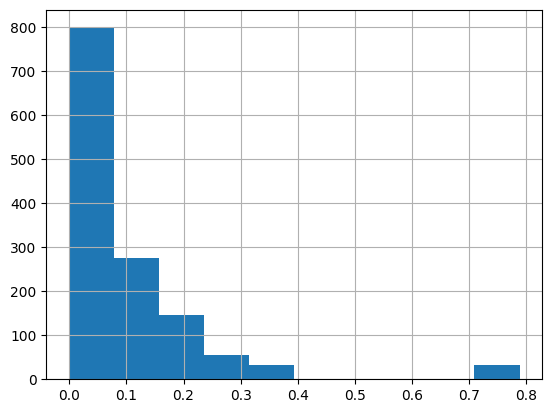

In [443]:
df_proceso2.riesgo.hist()

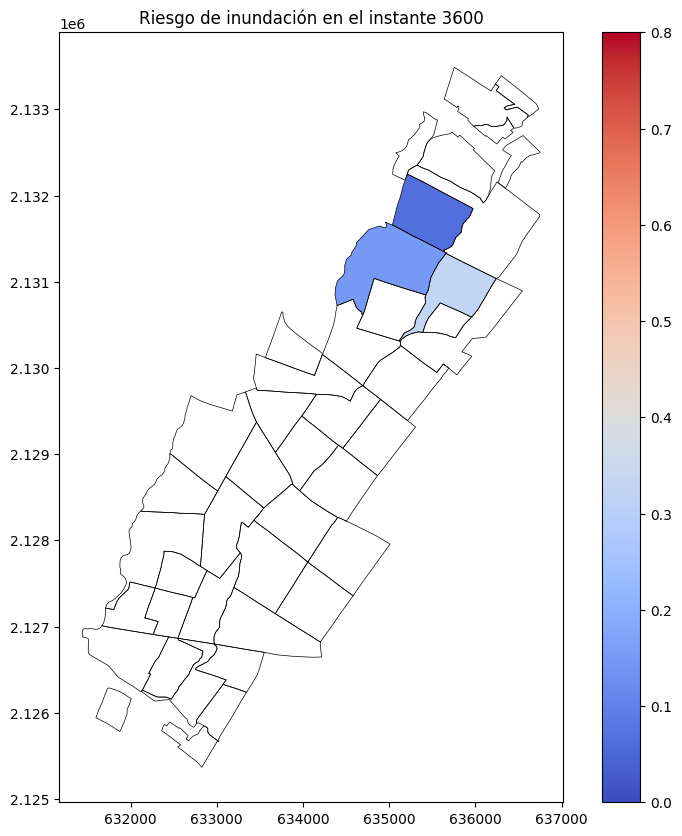

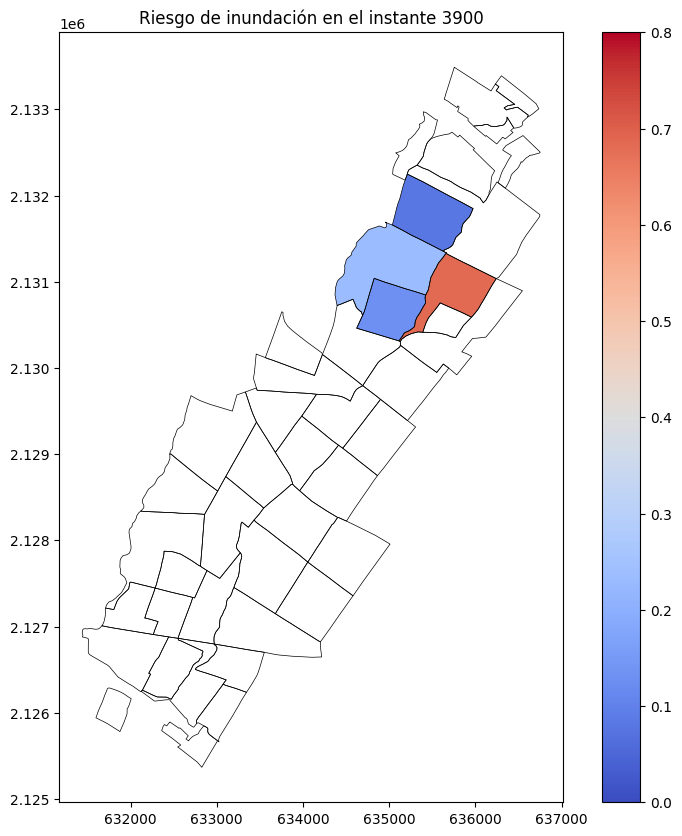

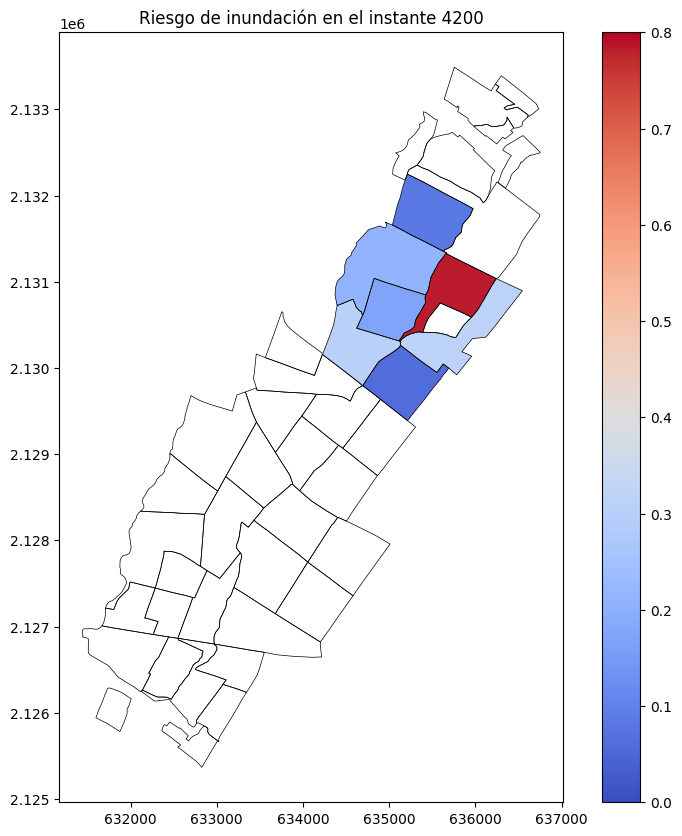

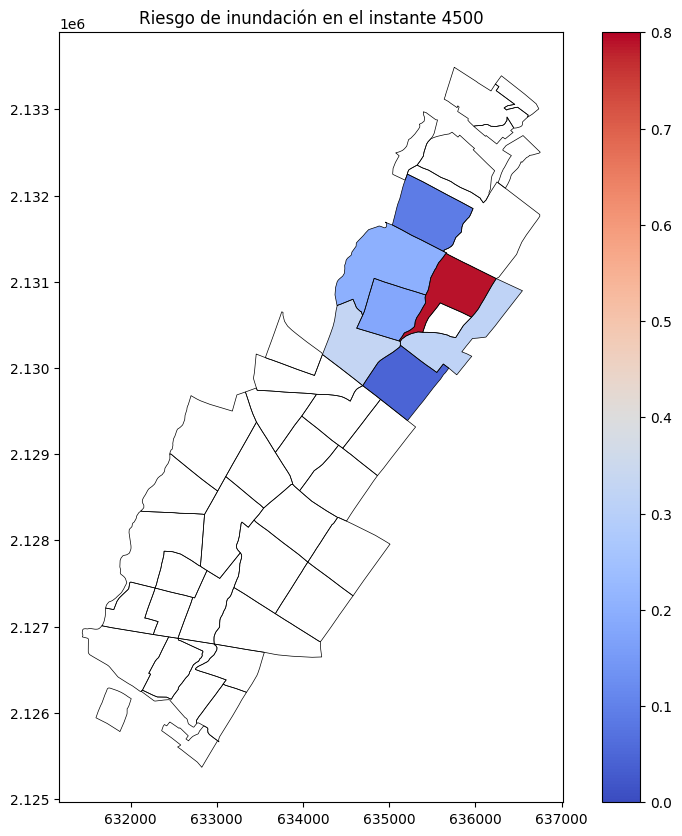

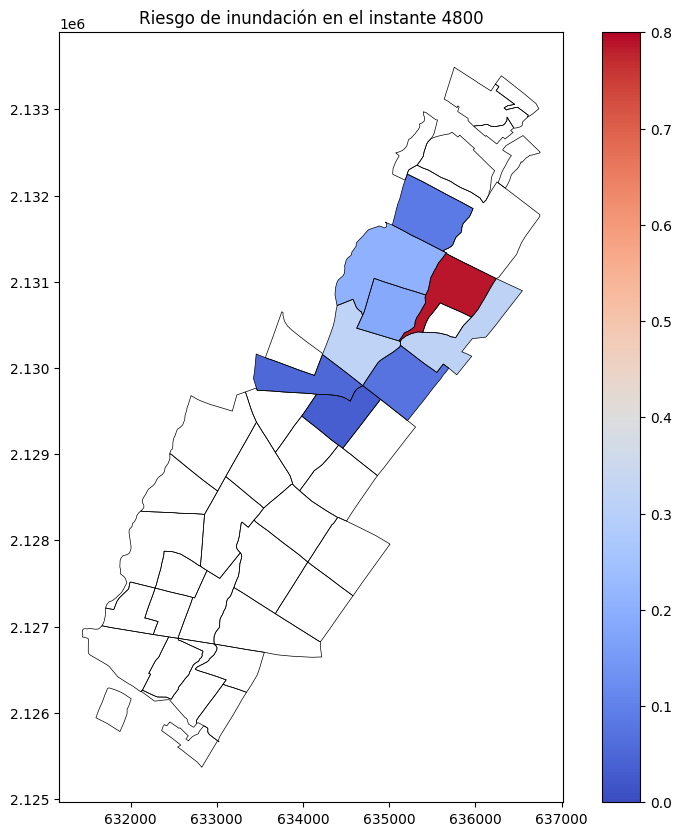

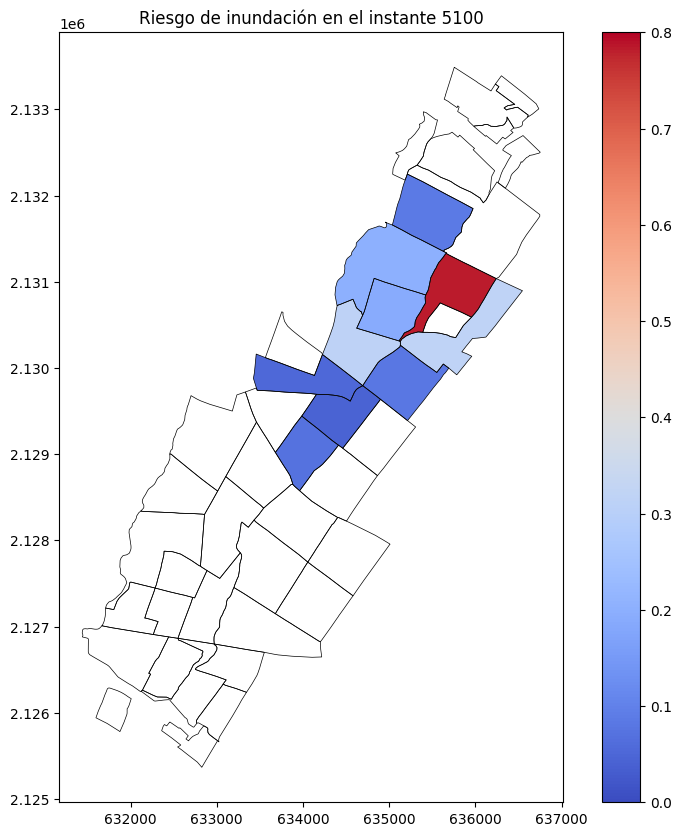

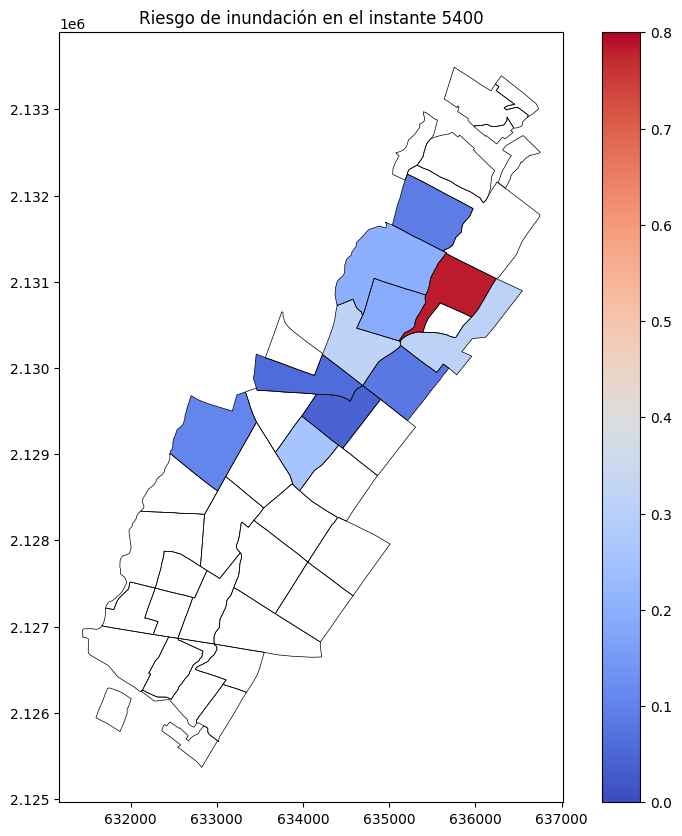

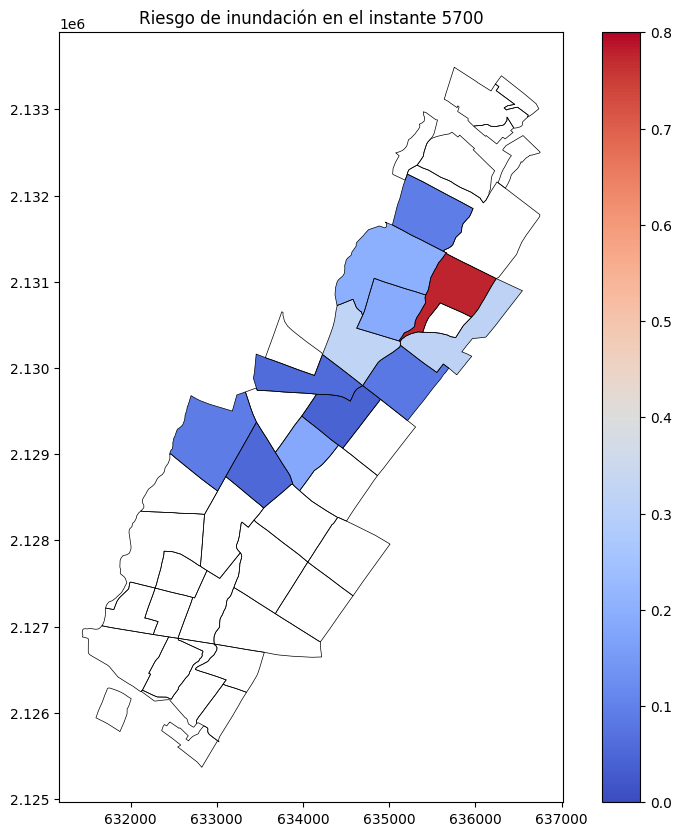

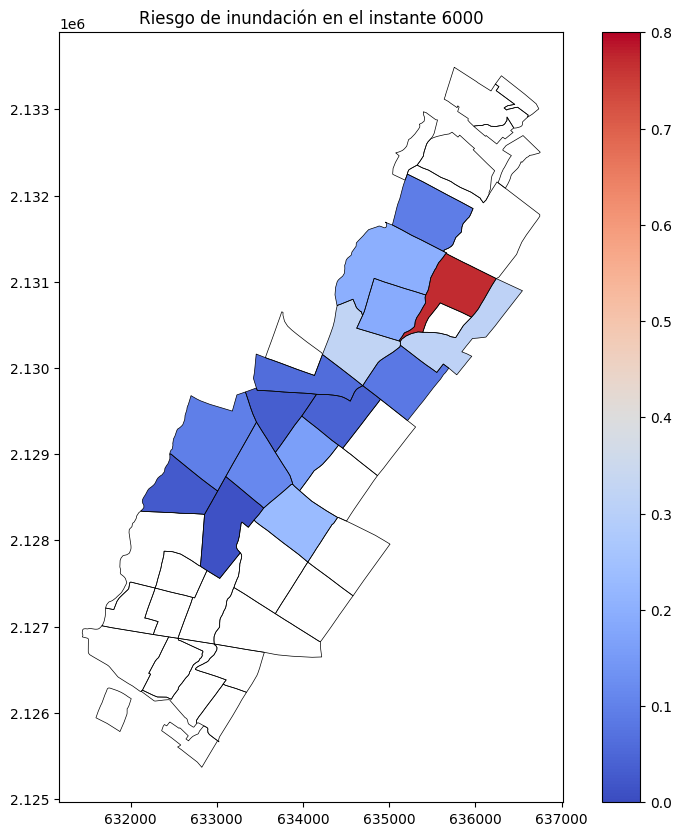

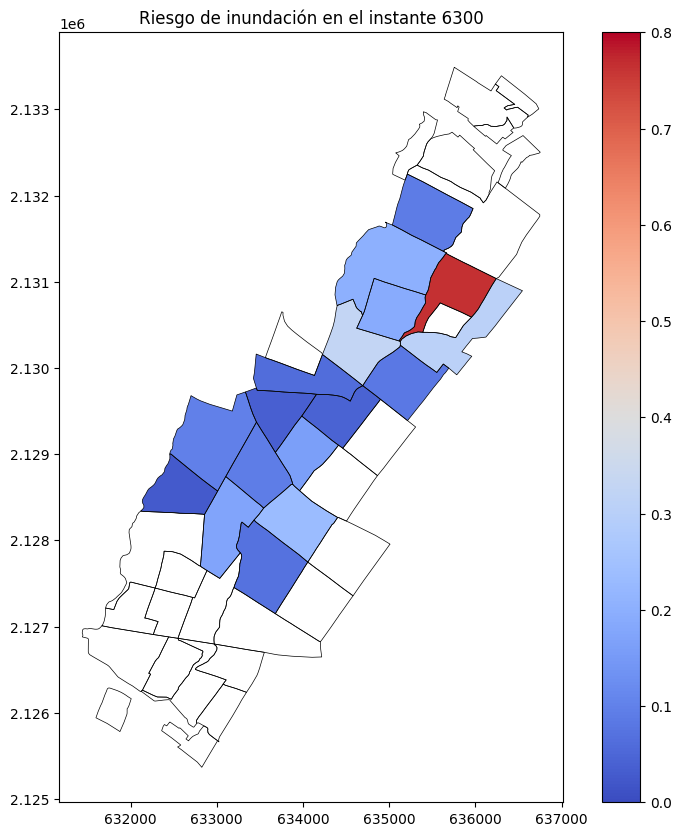

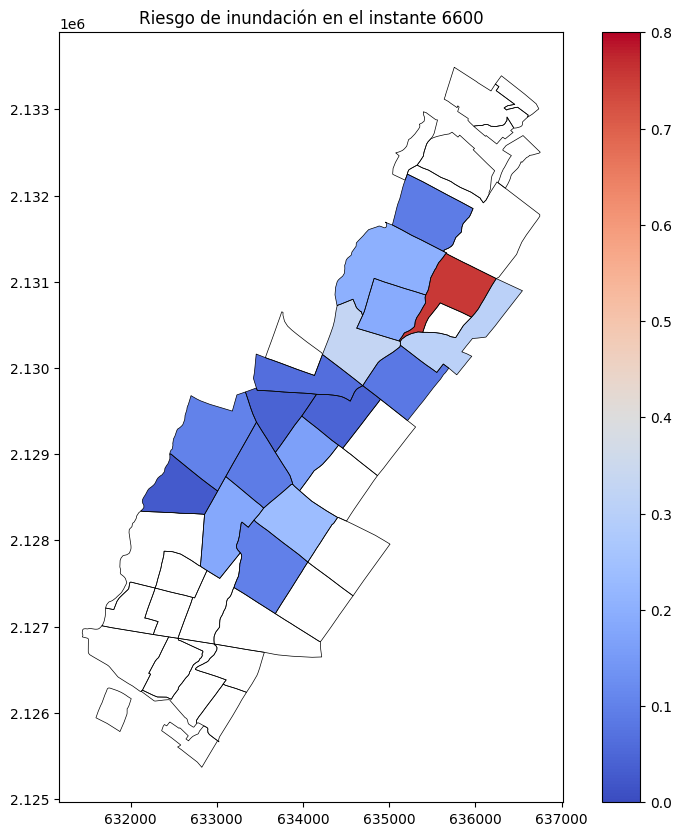

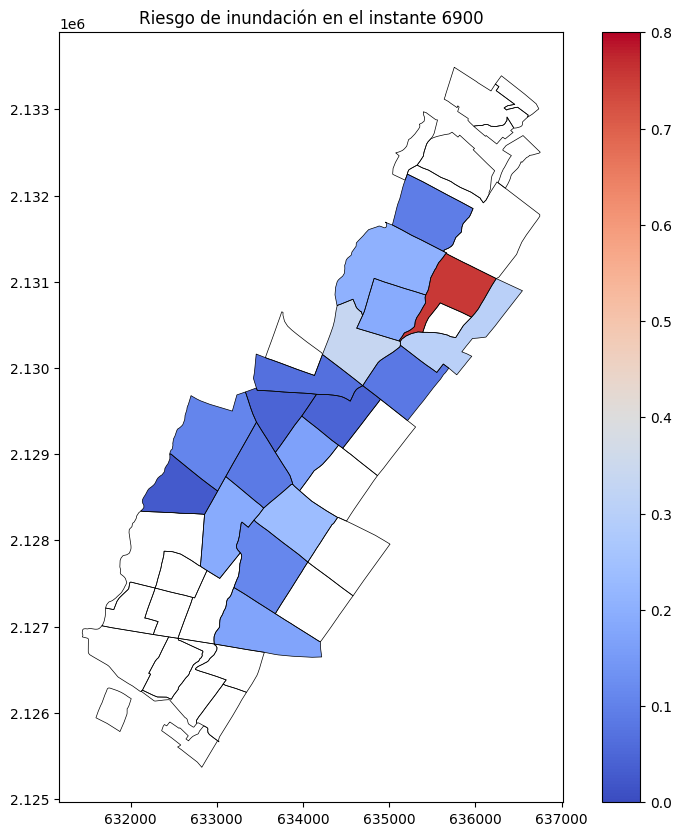

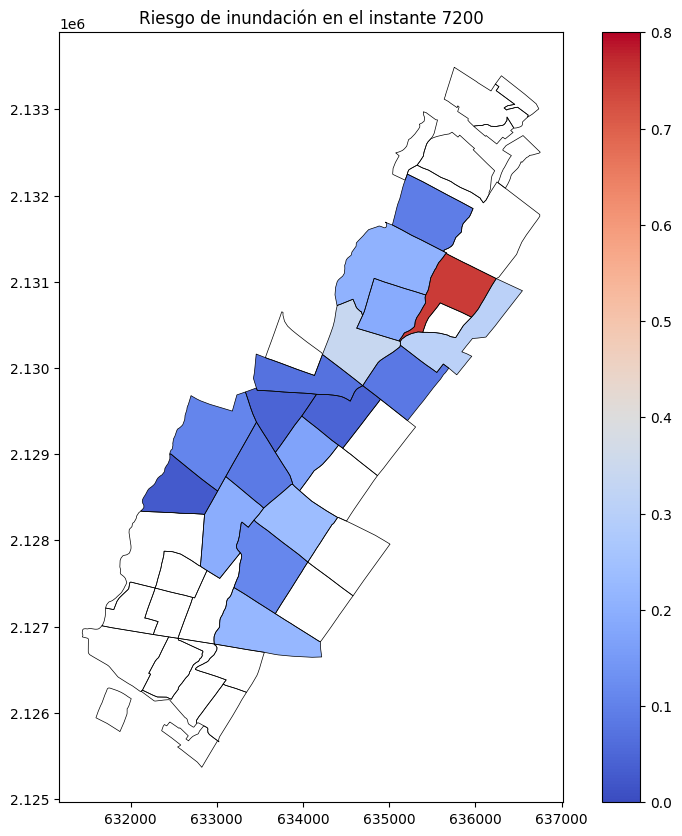

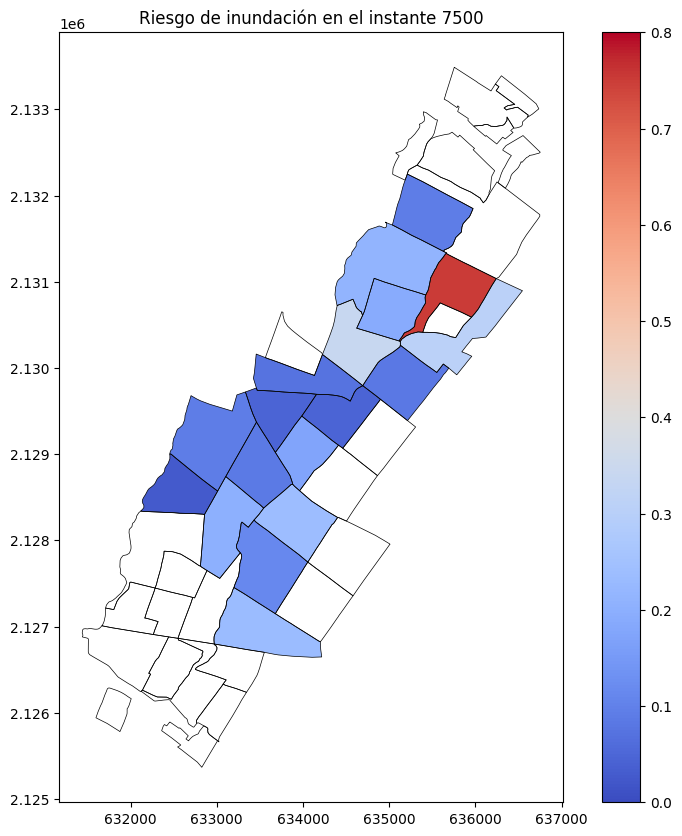

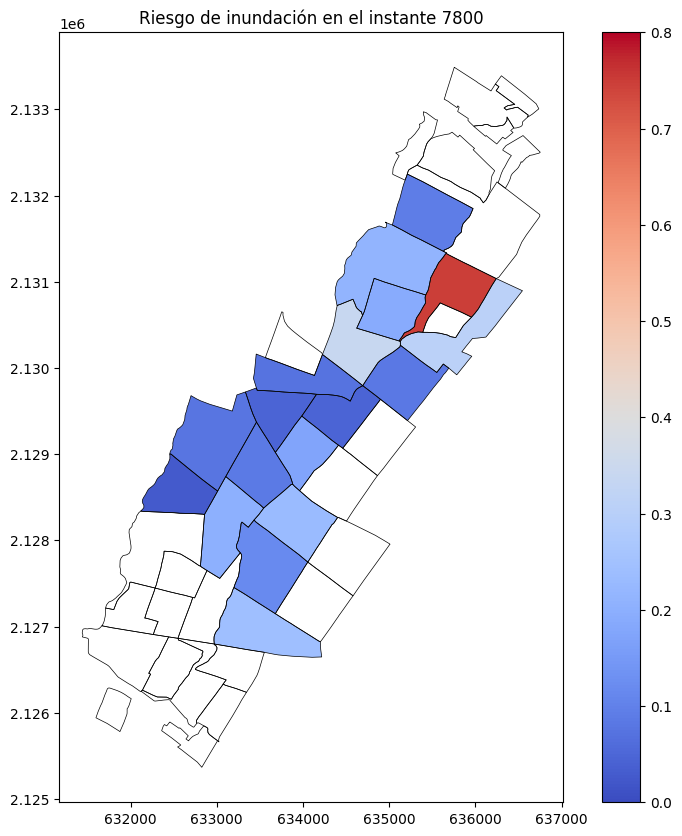

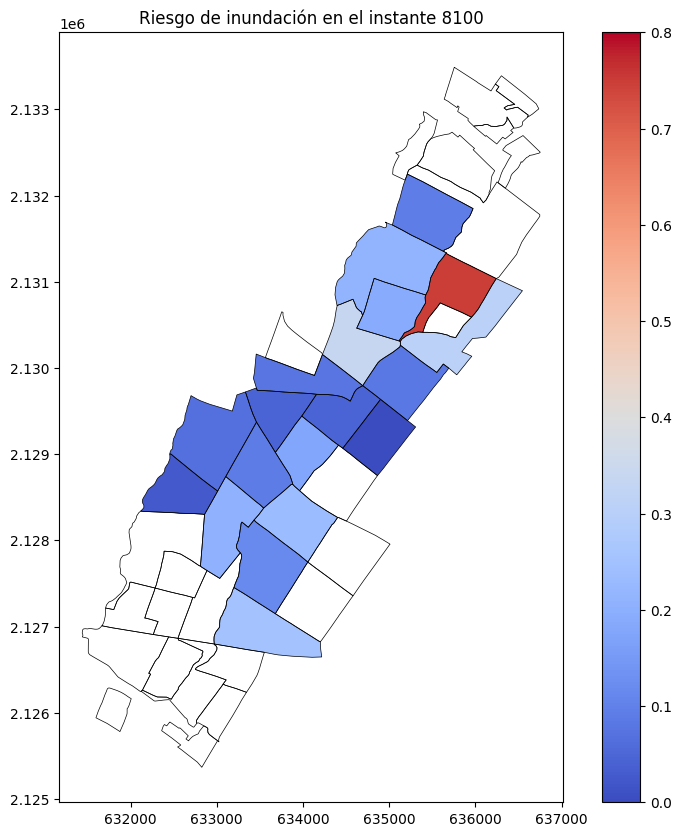

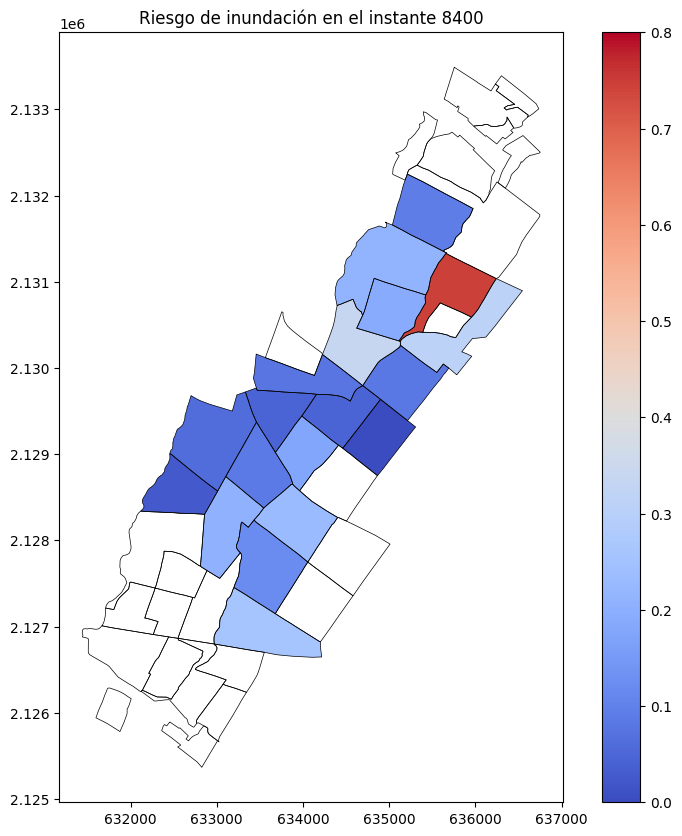

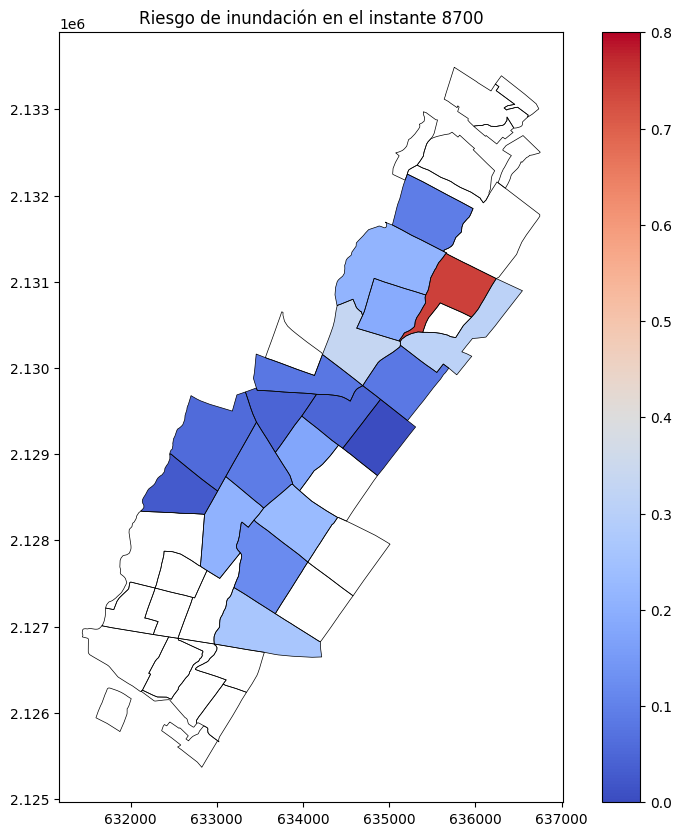

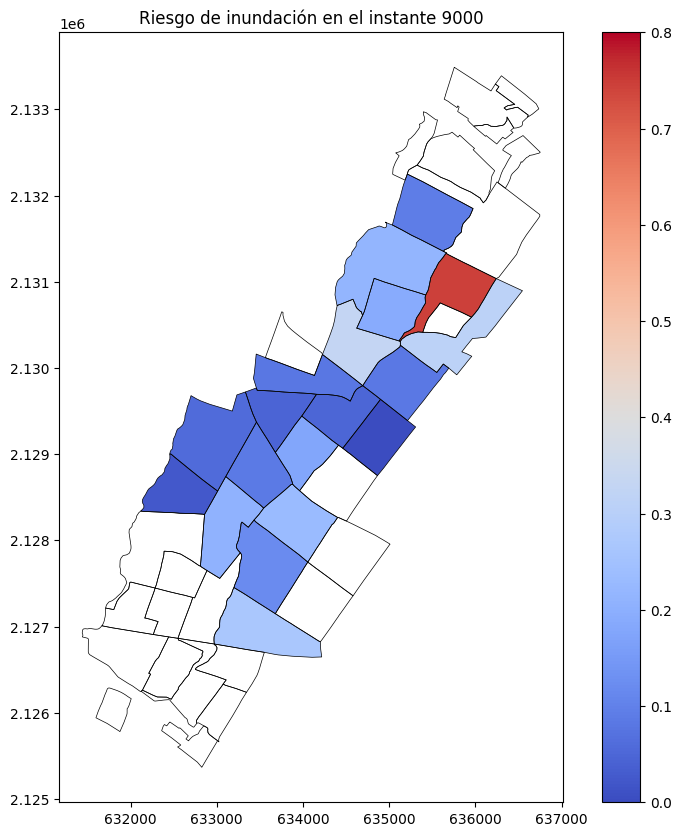

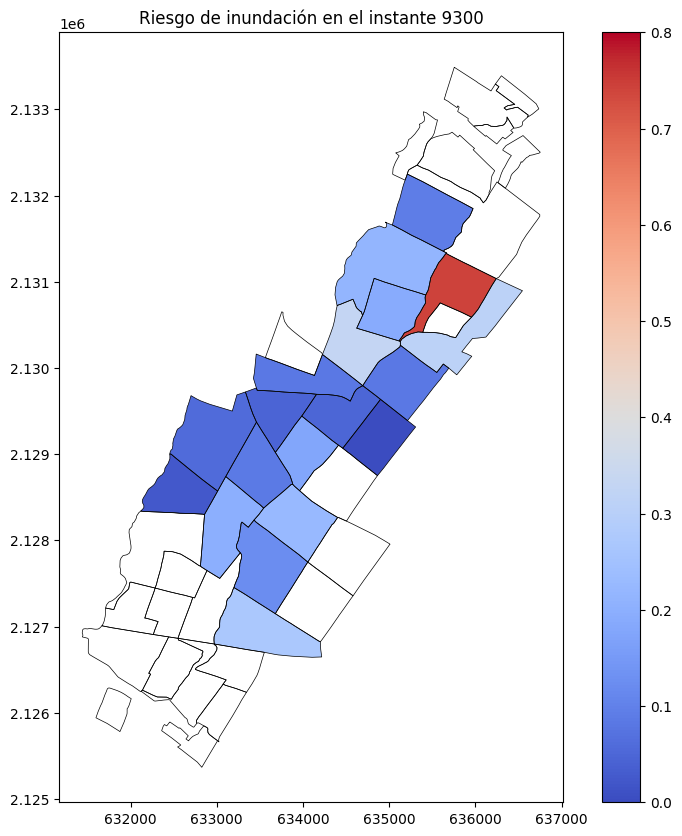

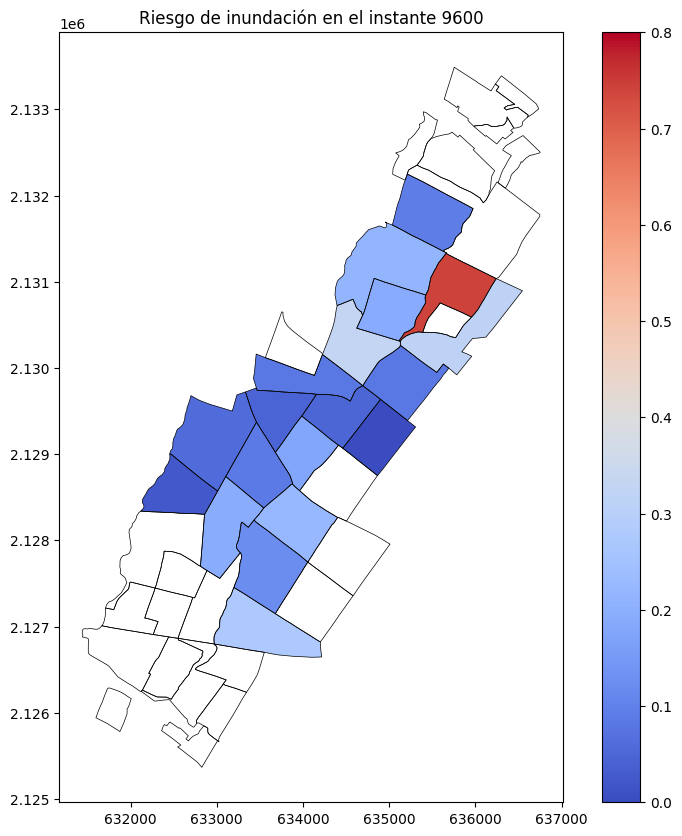

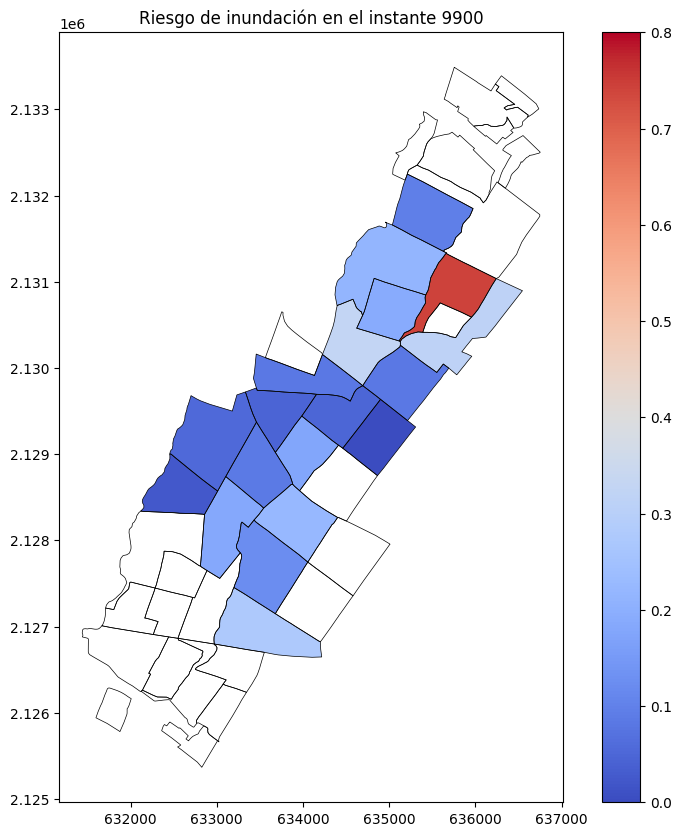

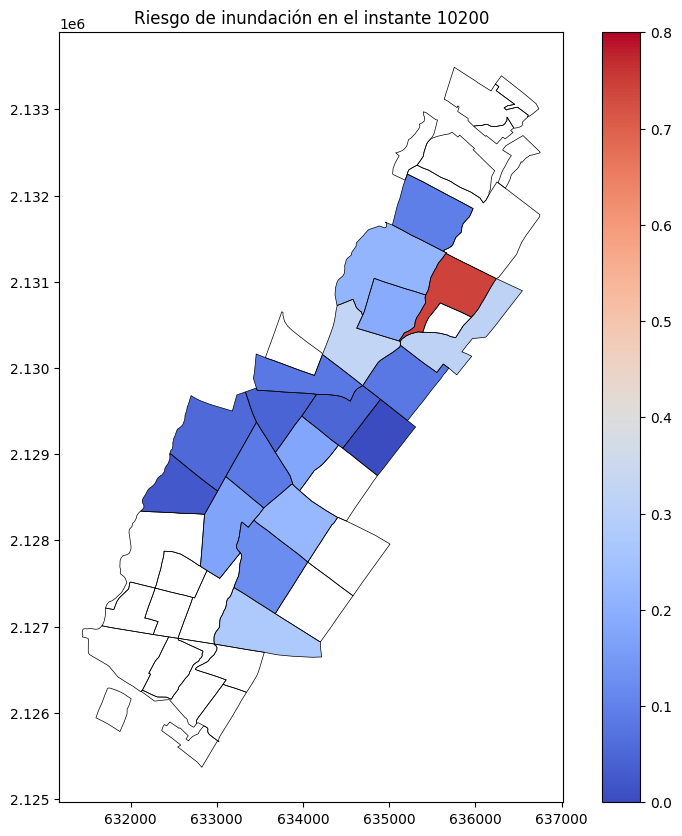

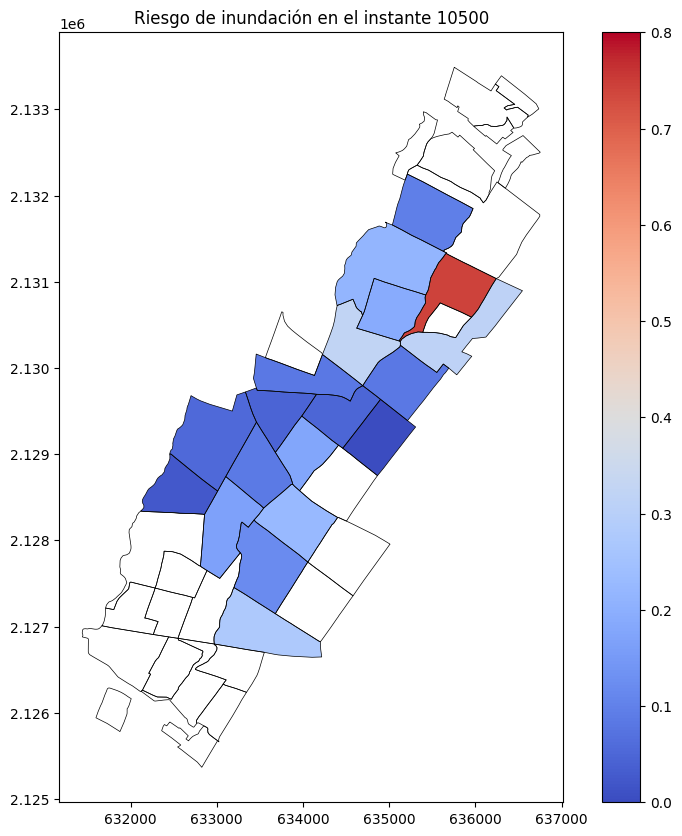

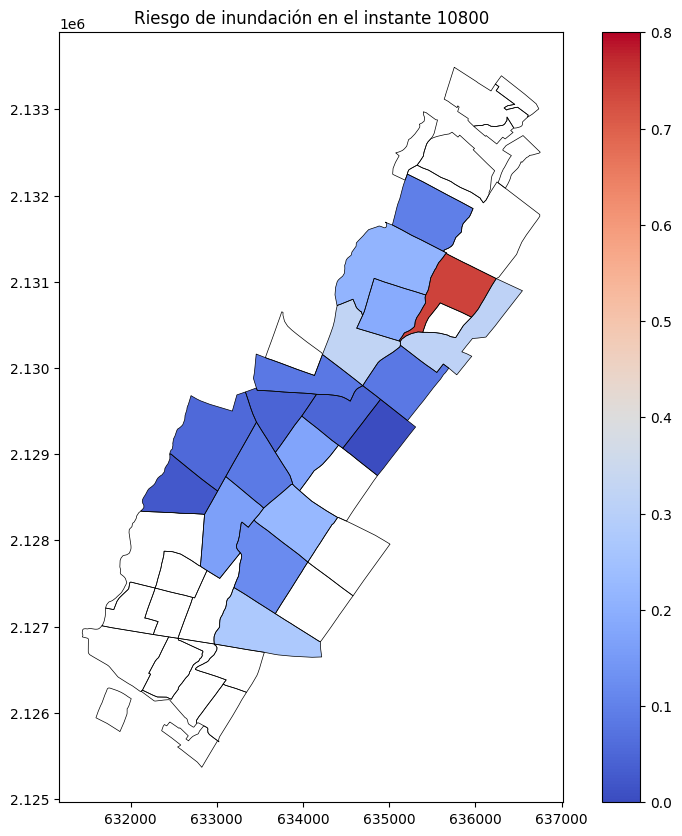

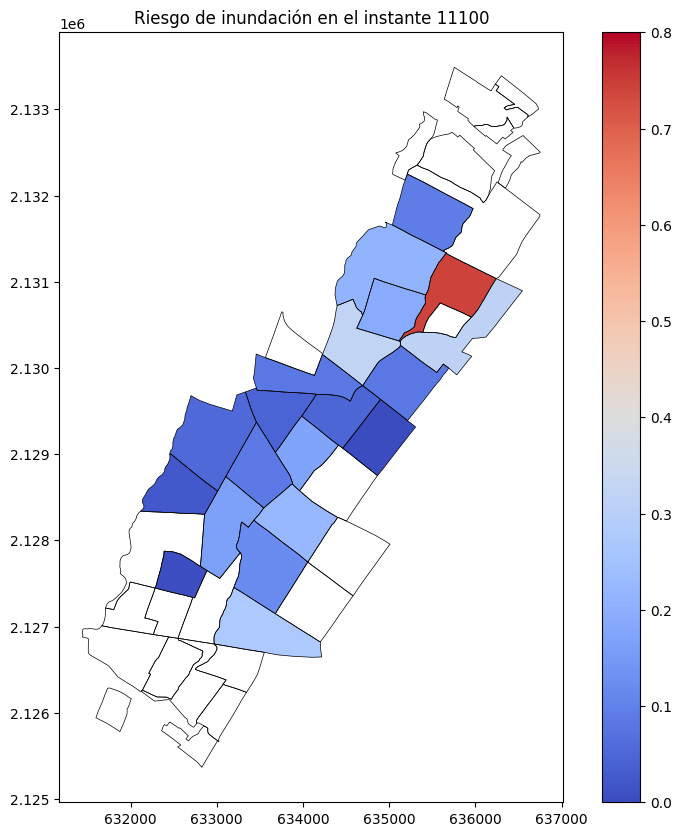

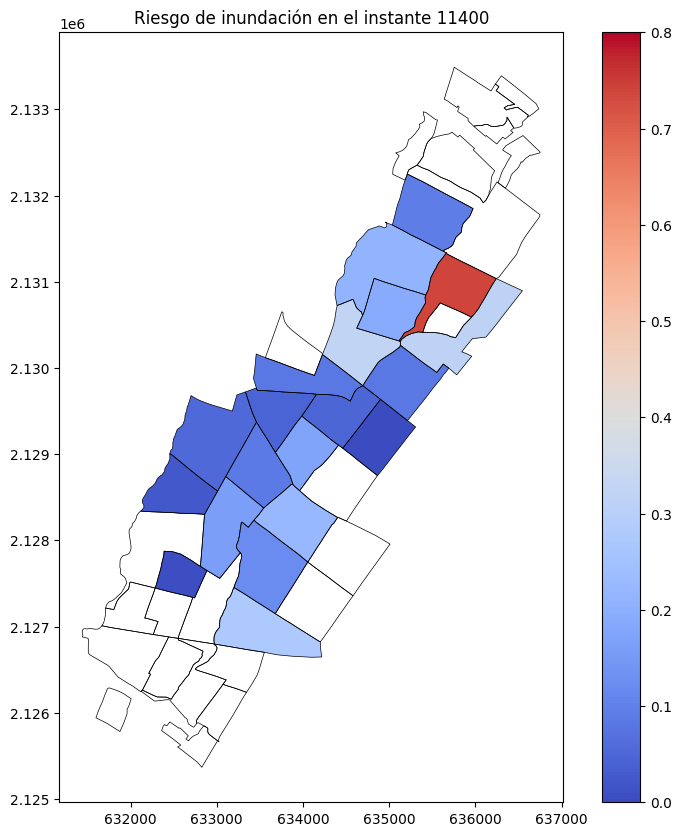

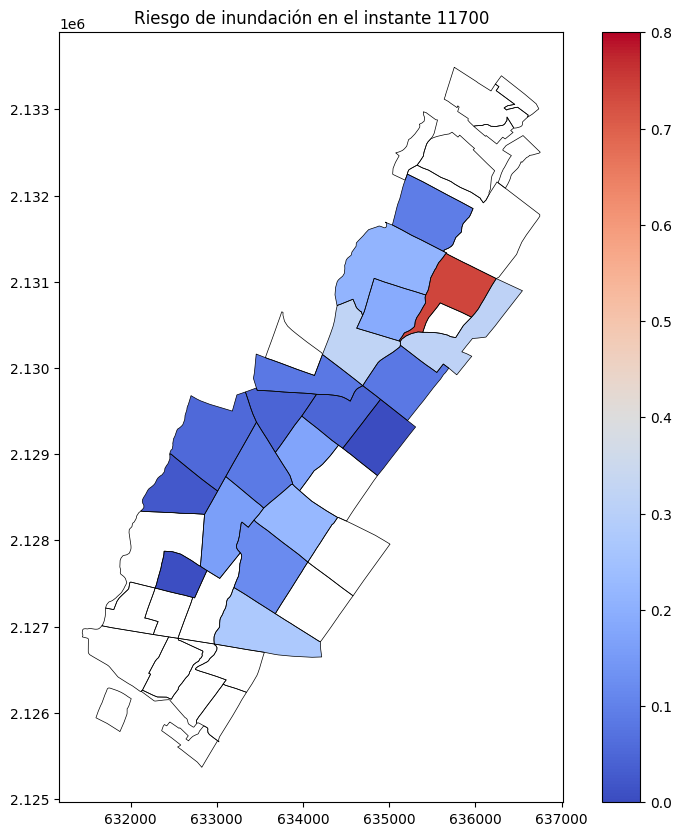

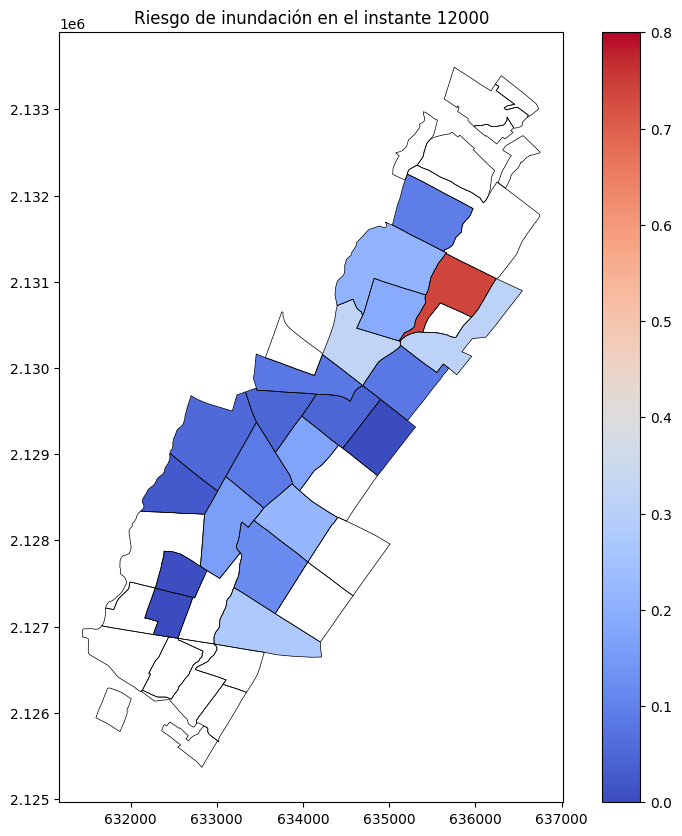

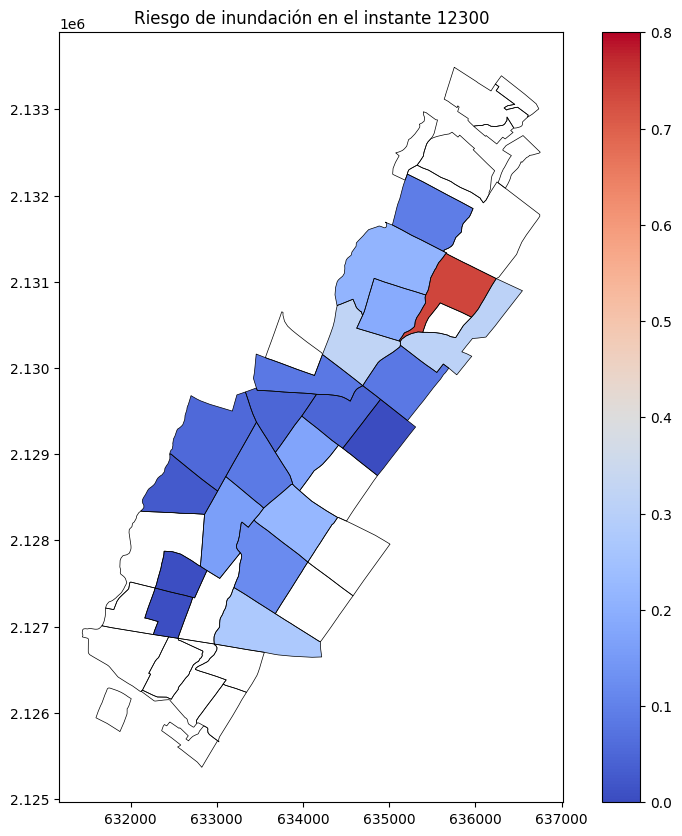

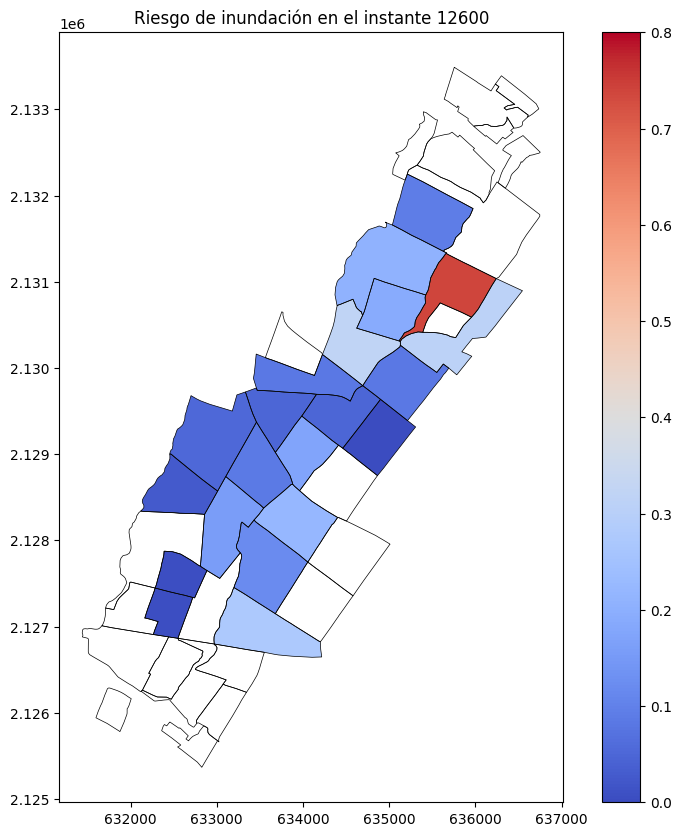

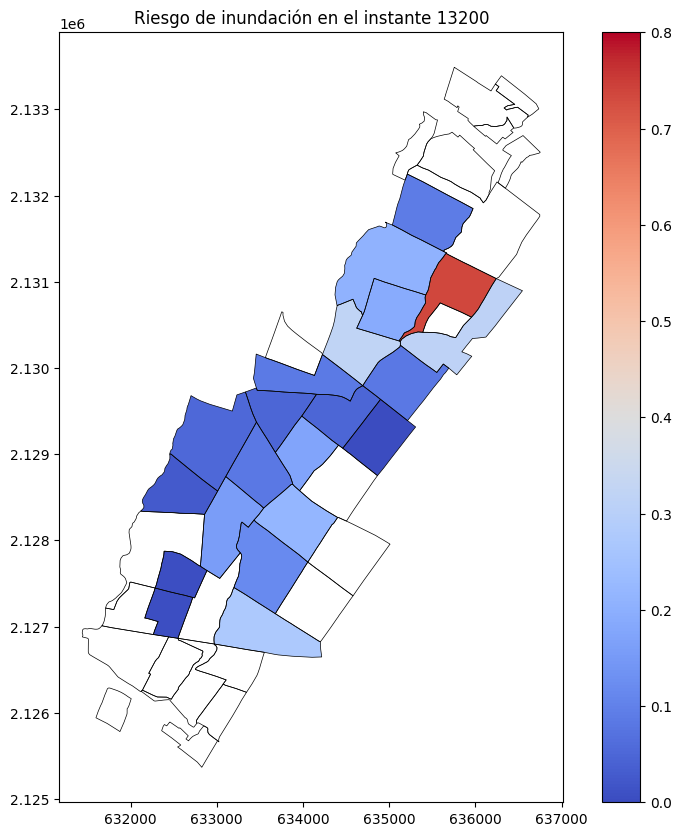

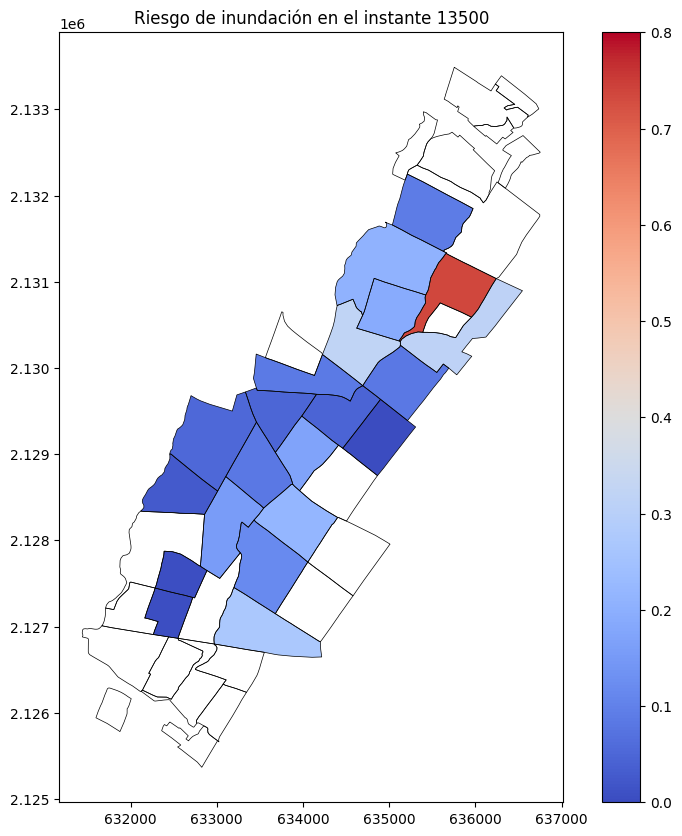

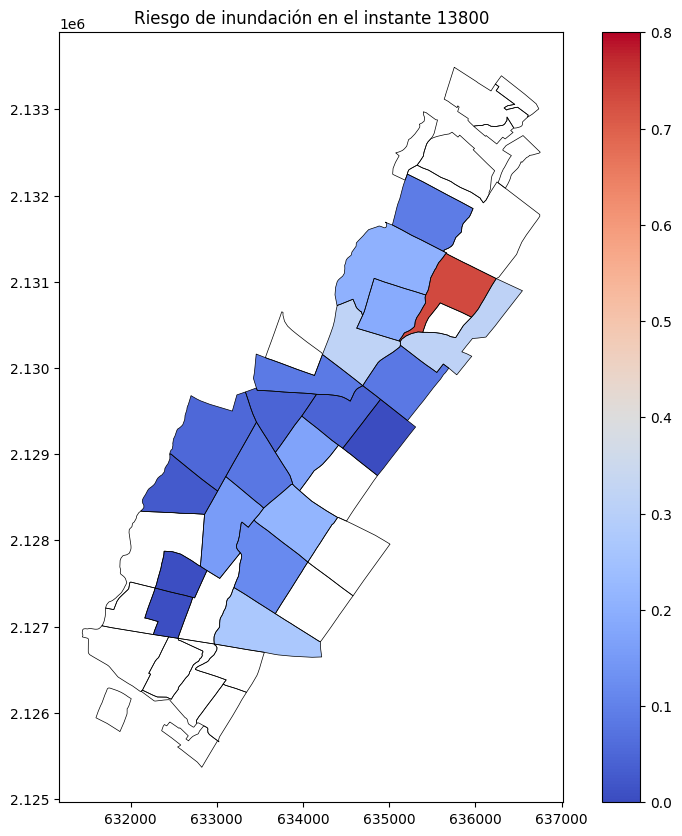

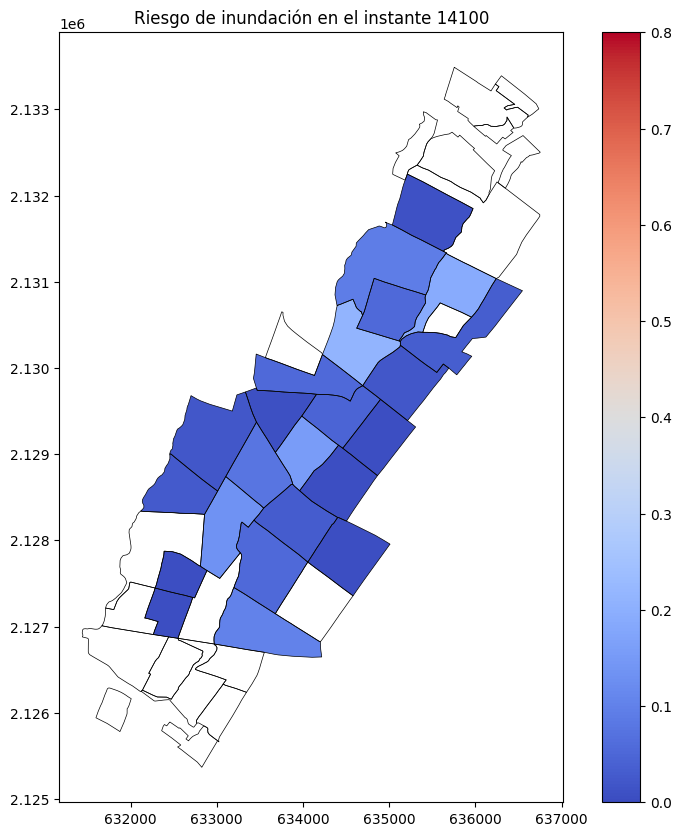

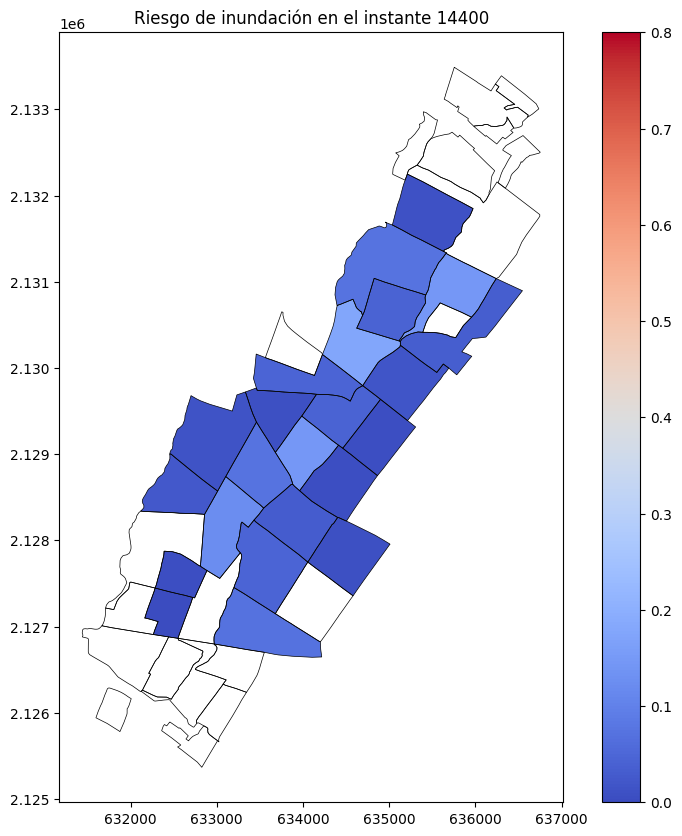

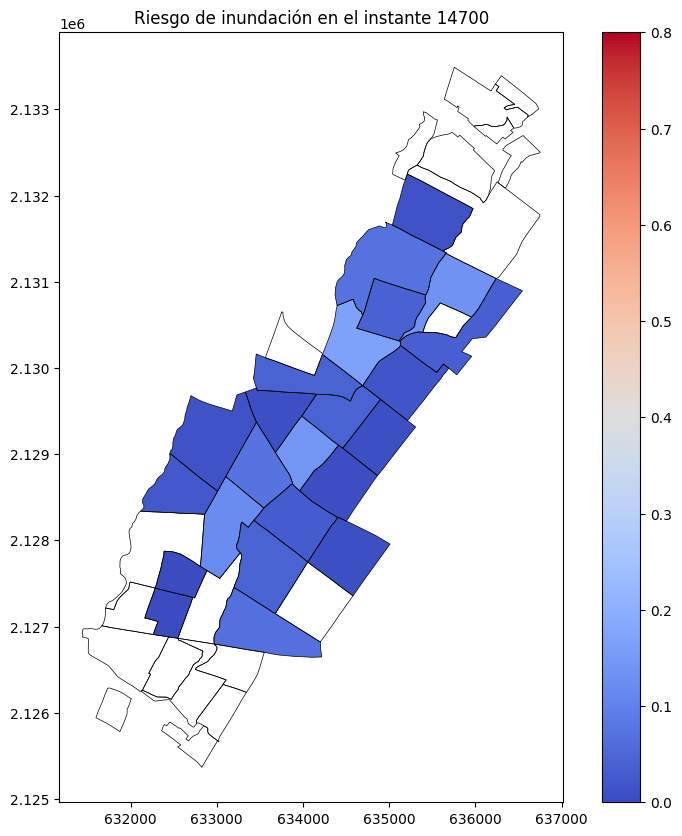

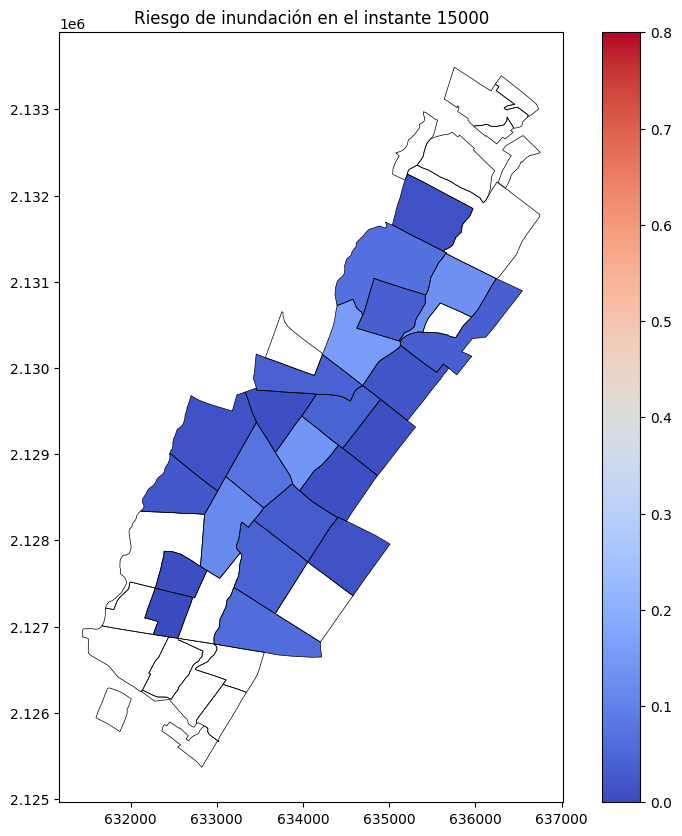

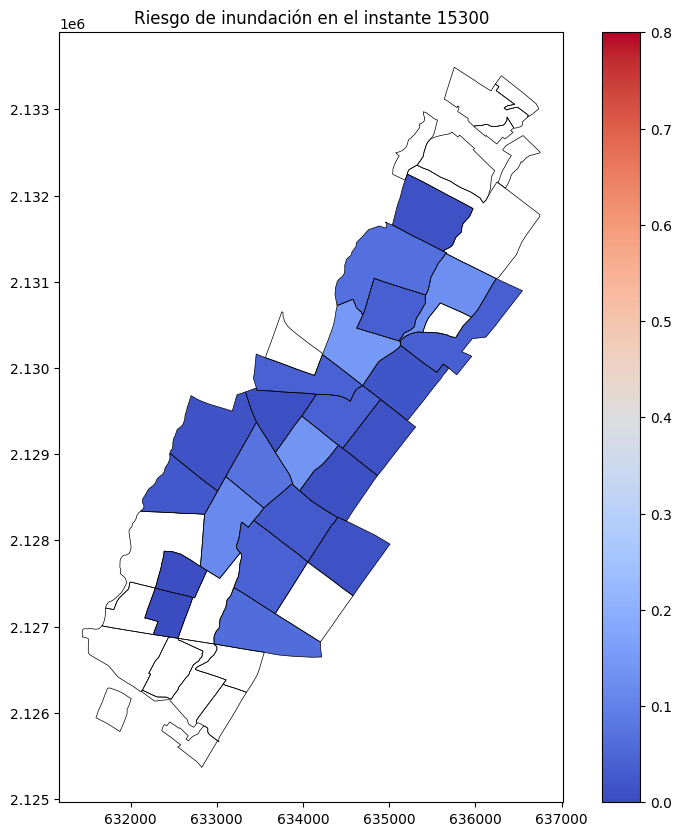

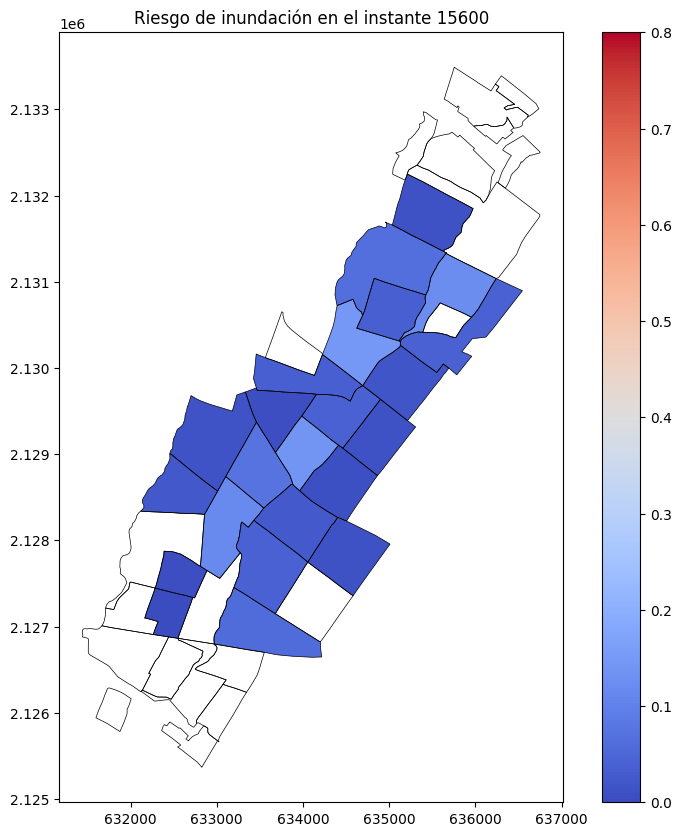

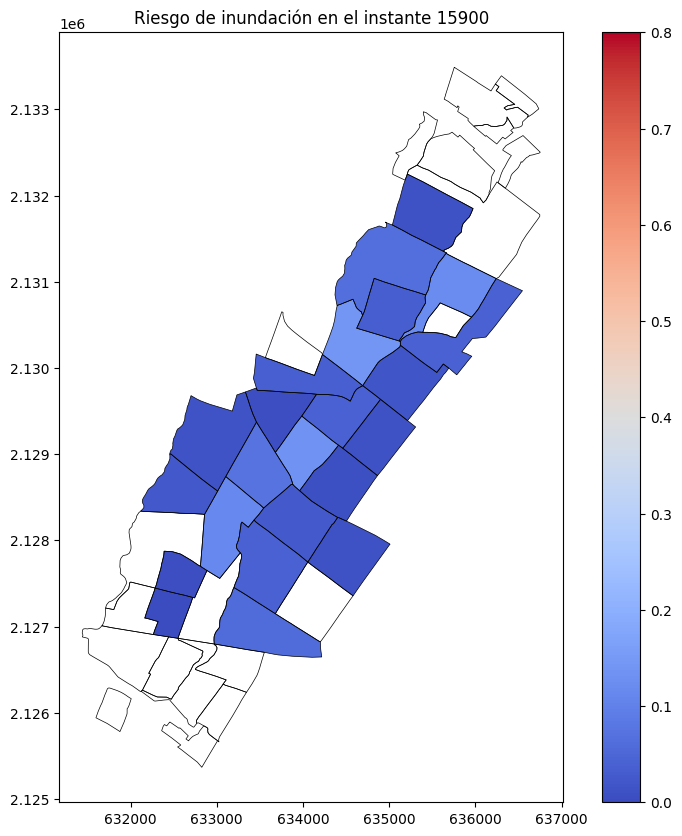

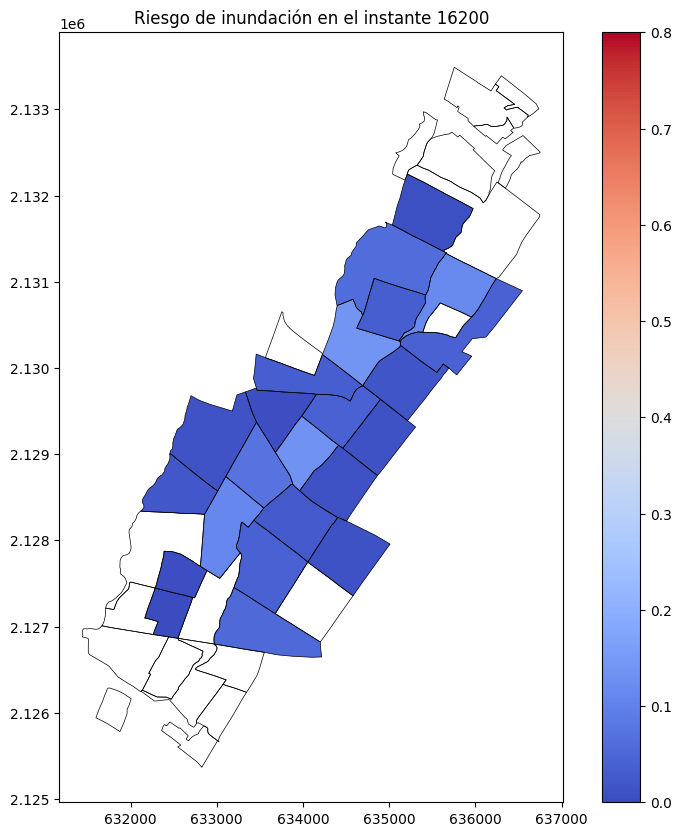

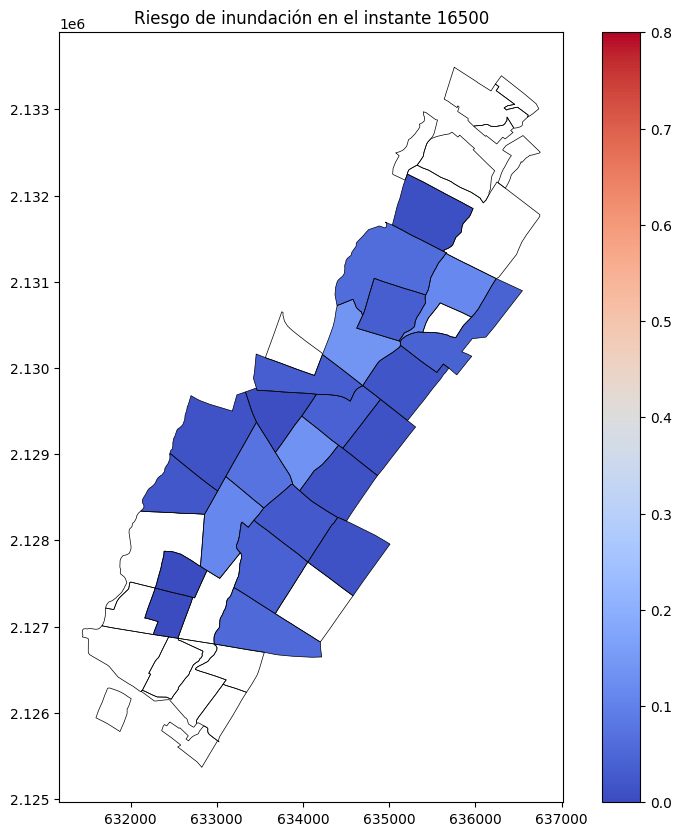

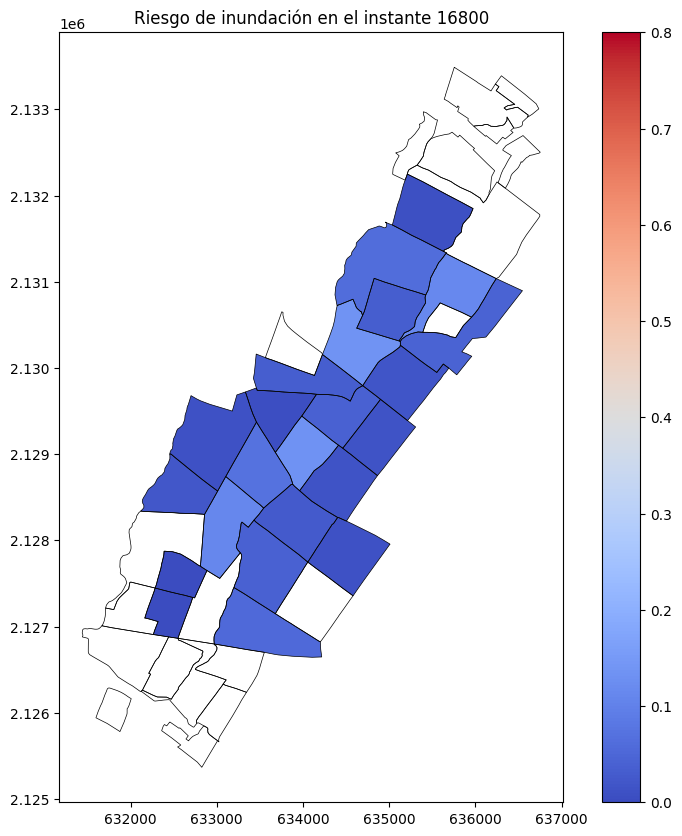

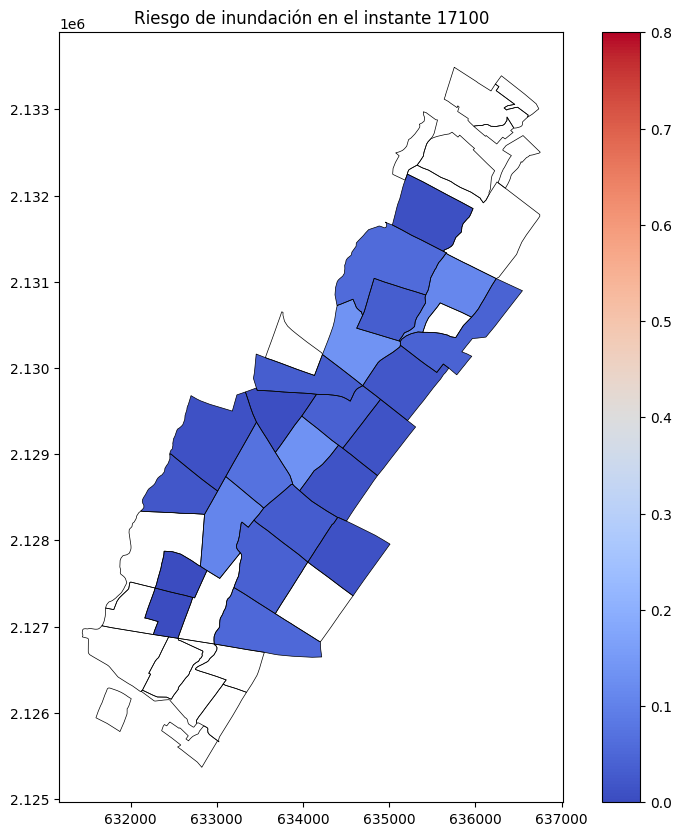

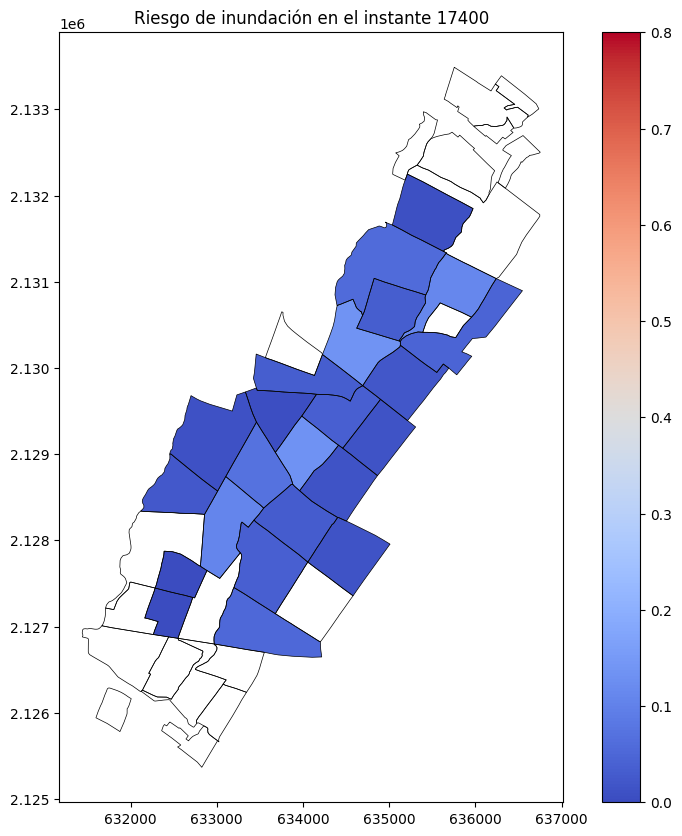

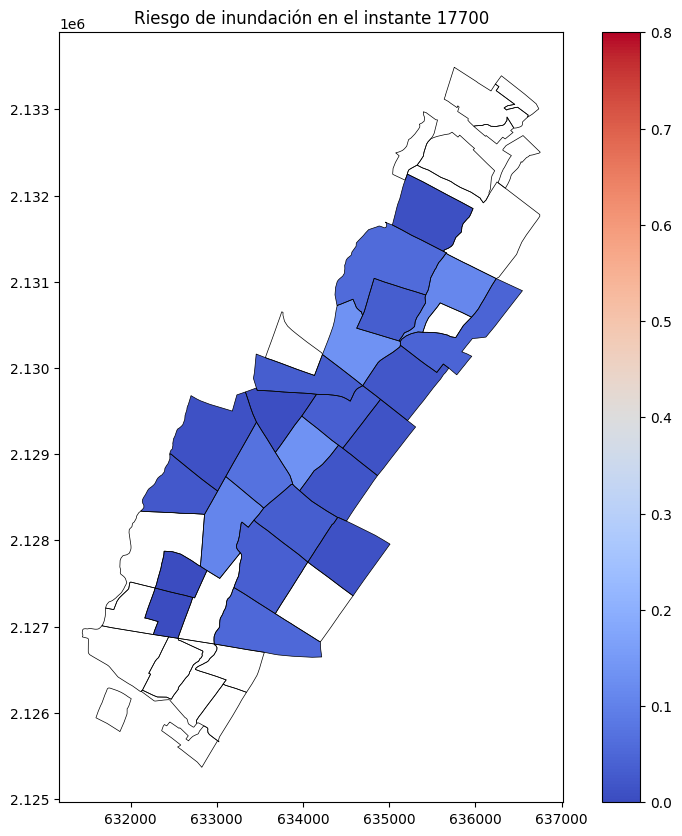

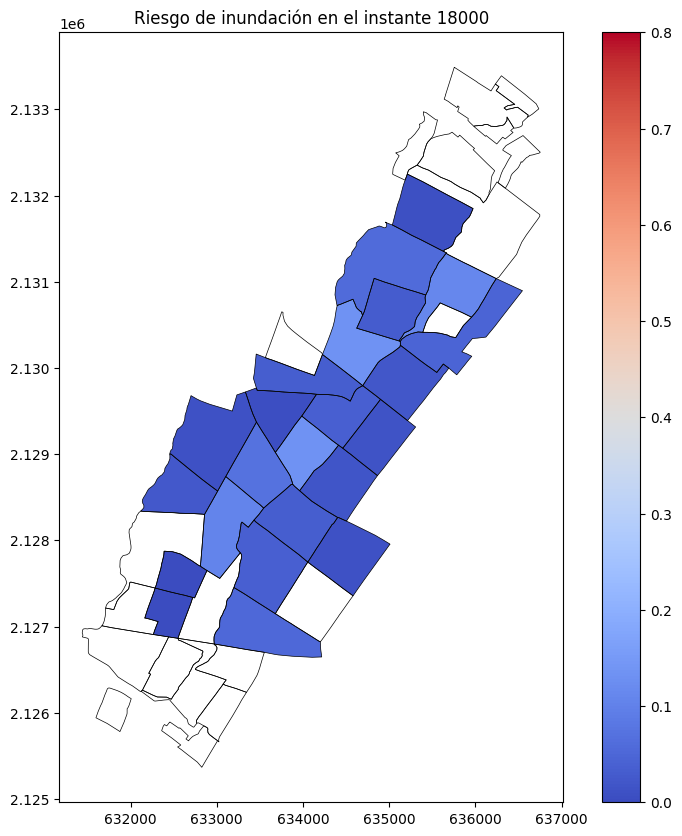

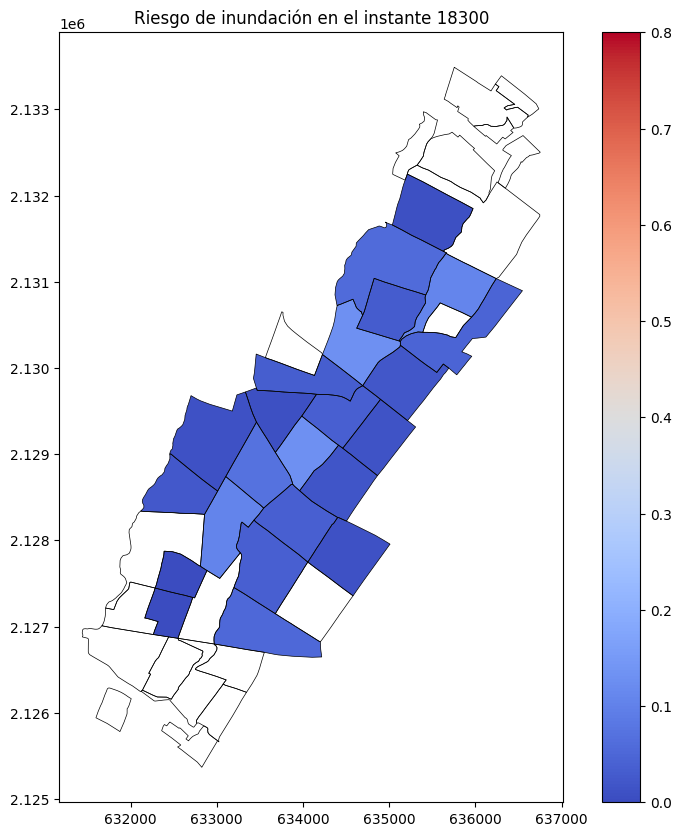

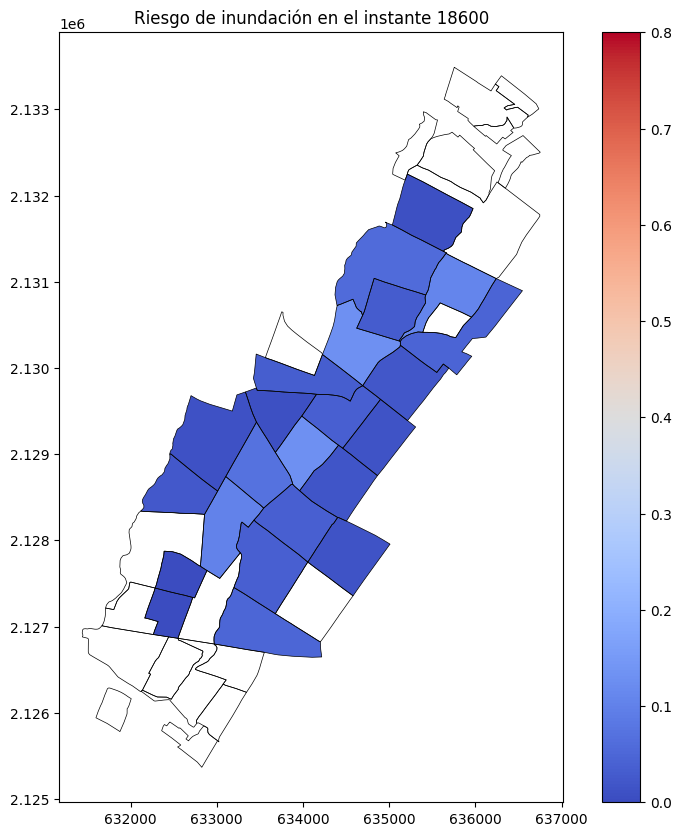

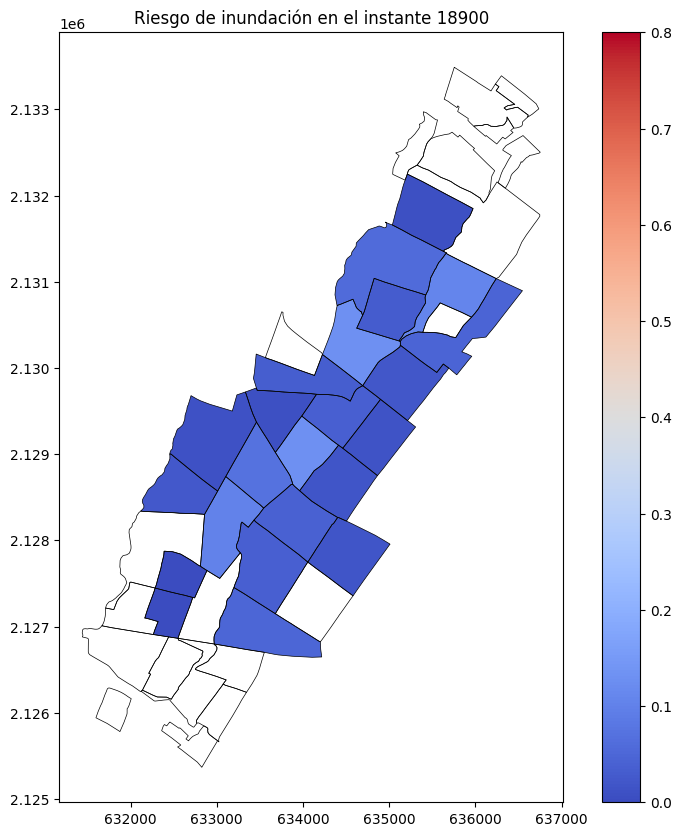

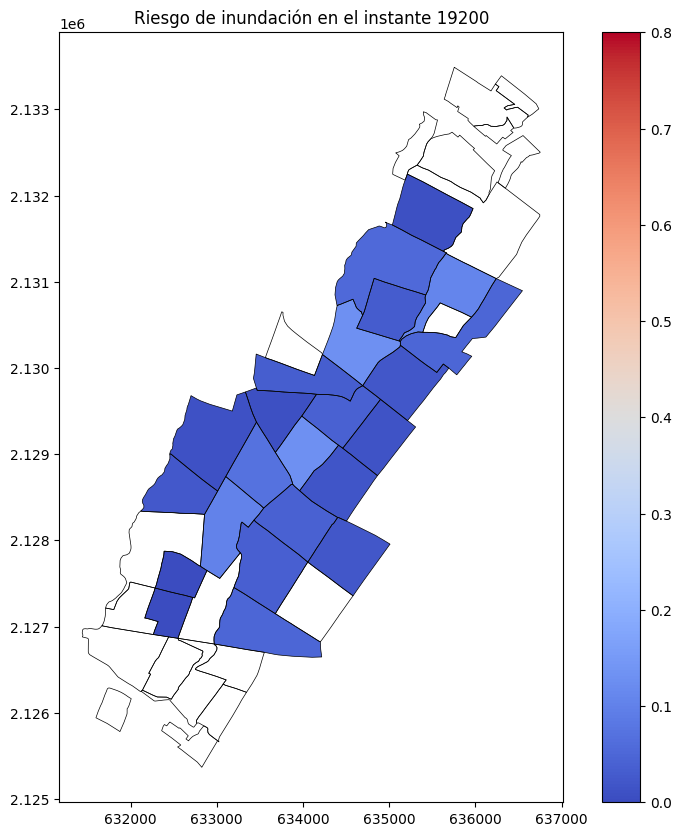

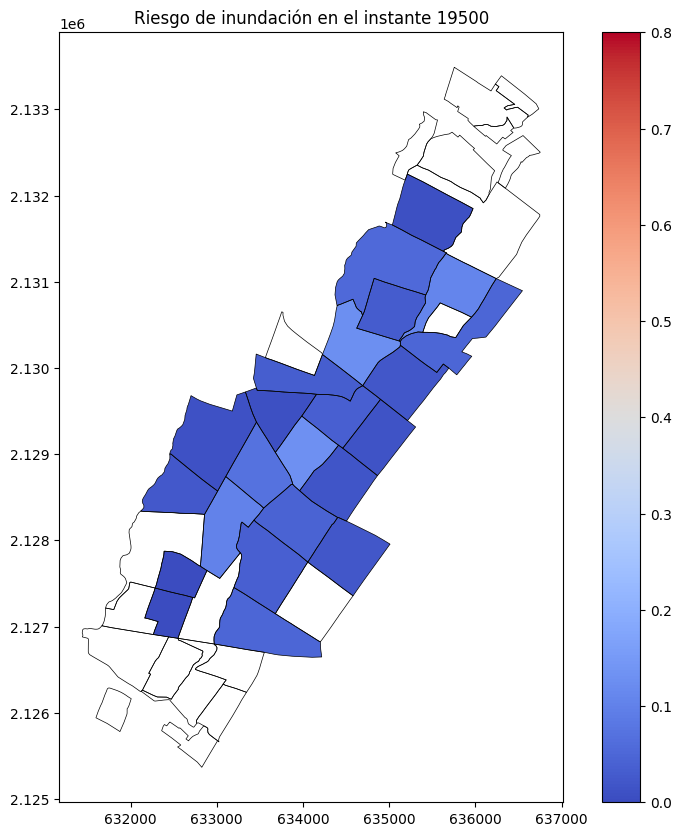

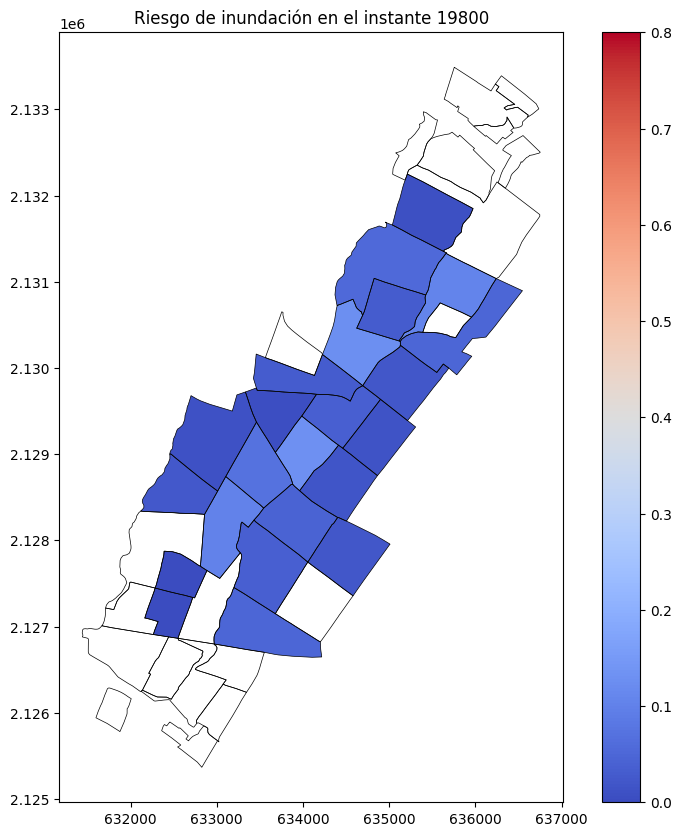

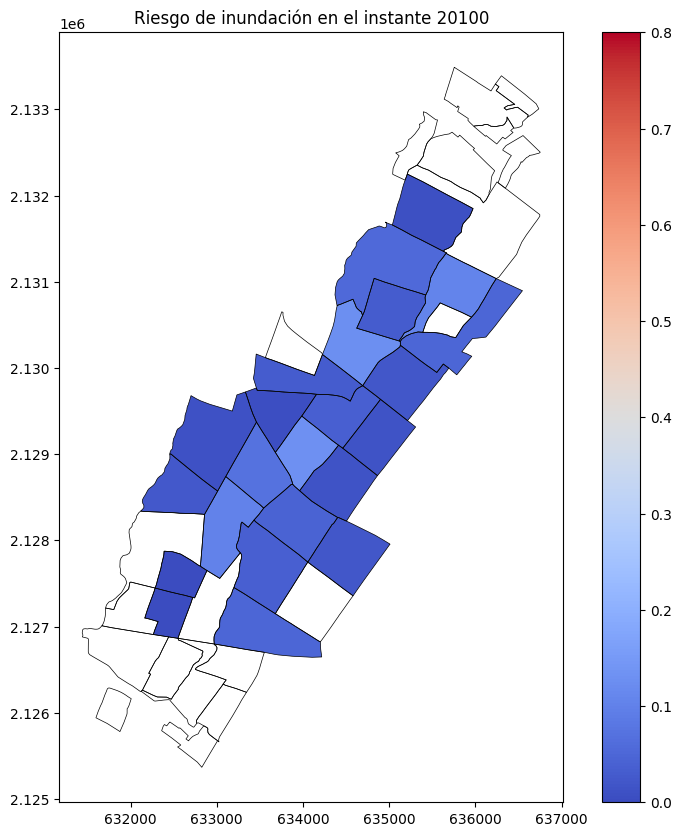

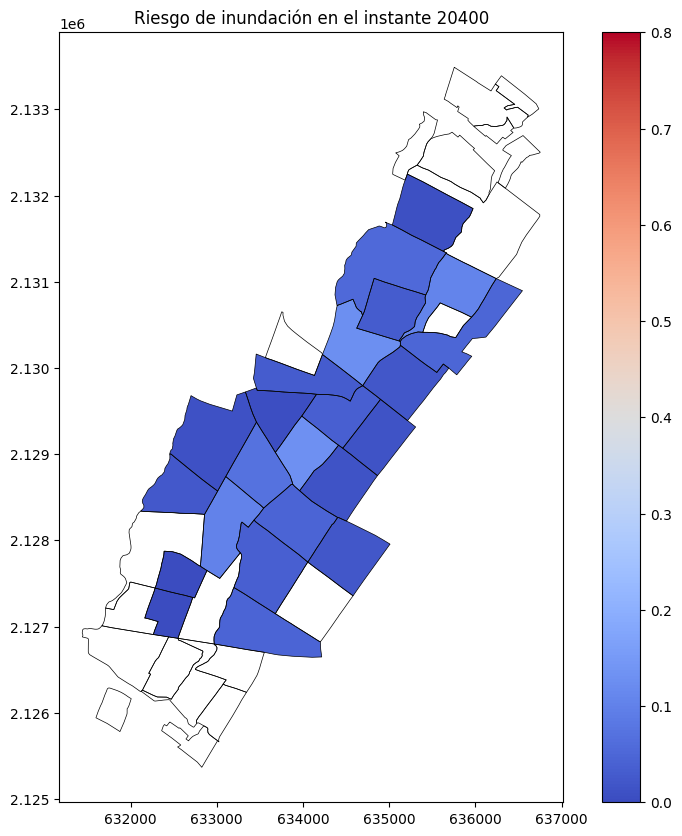

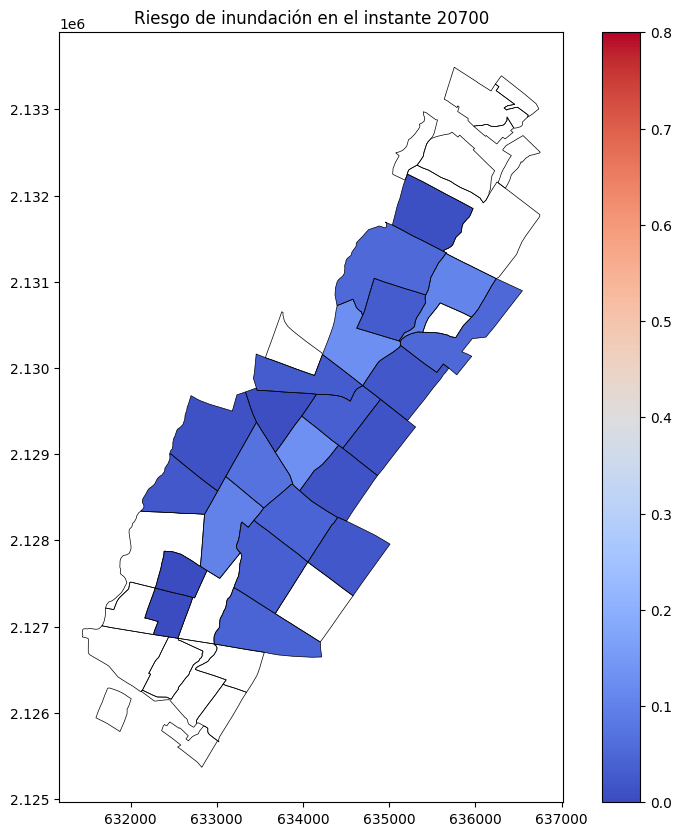

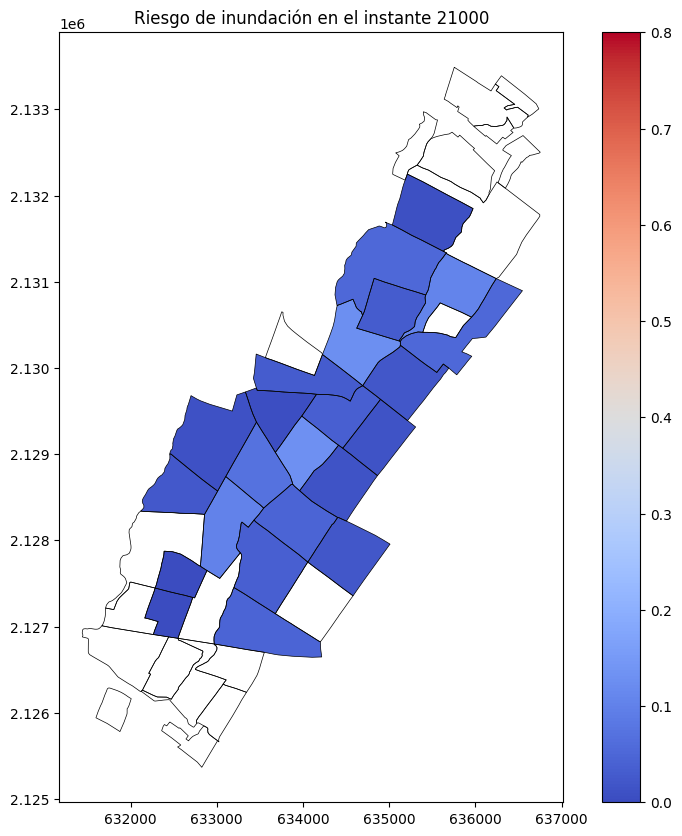

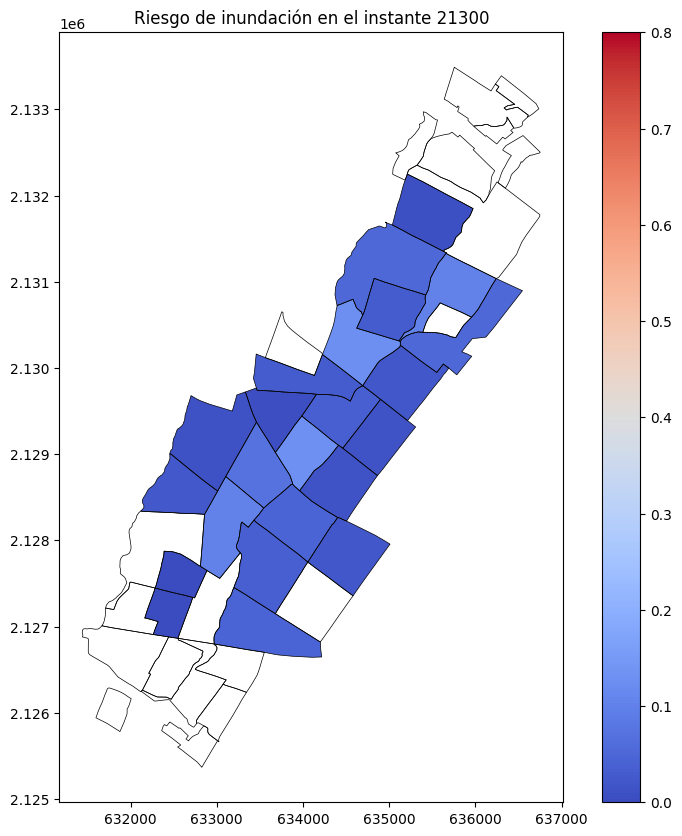

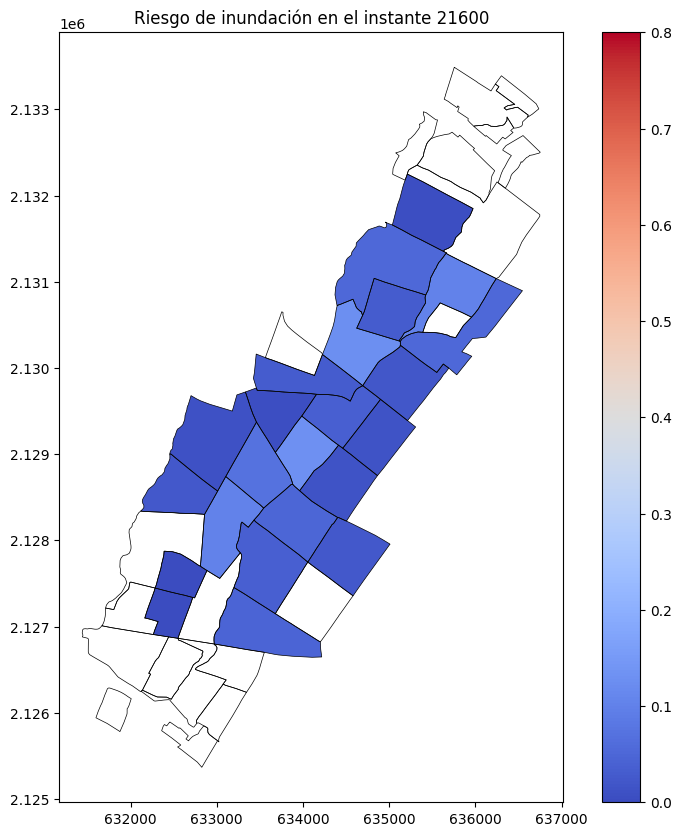

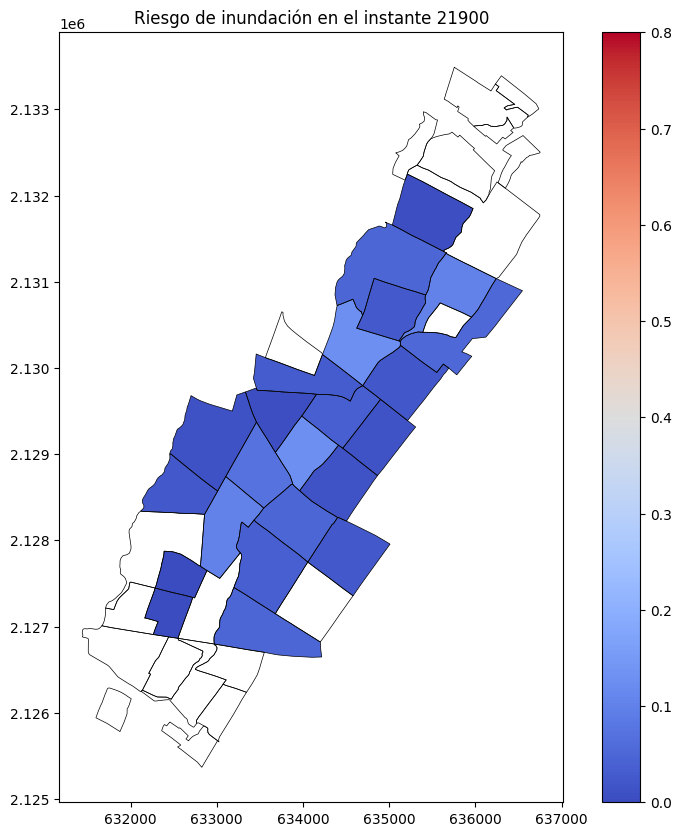

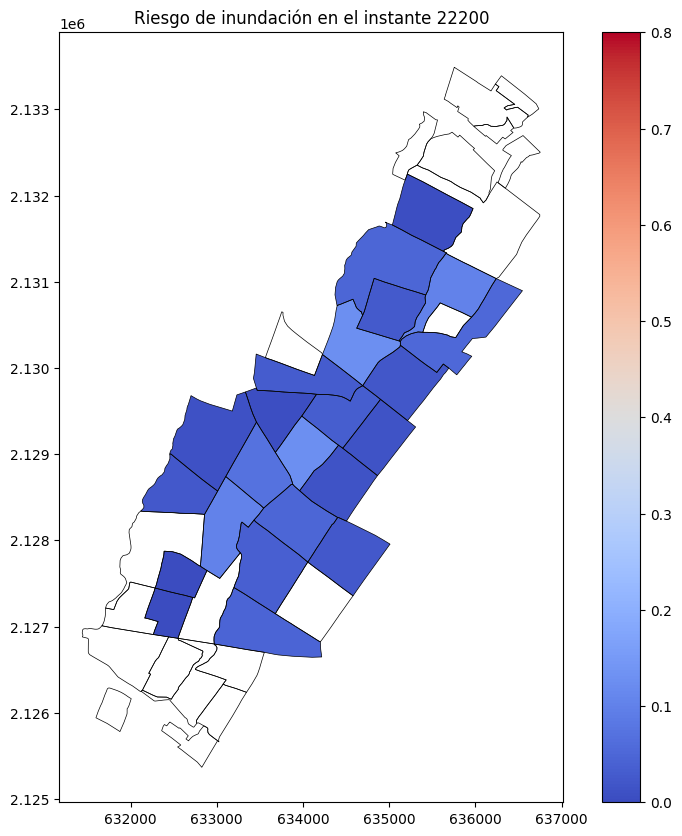

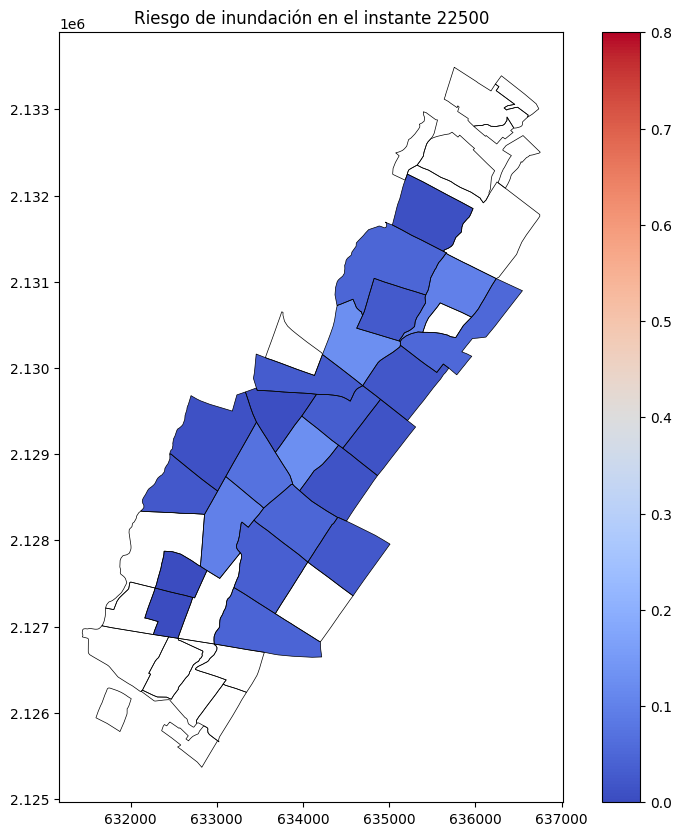

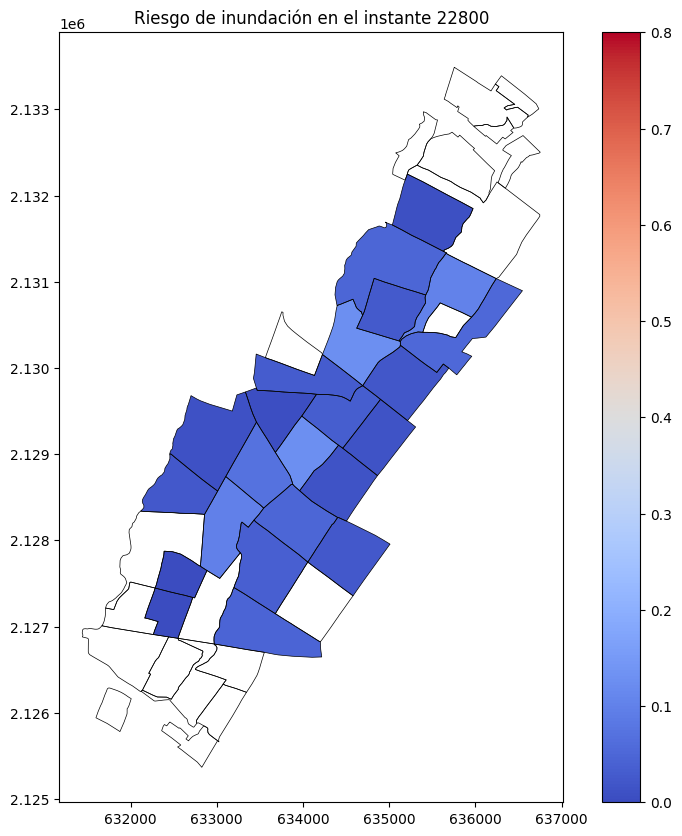

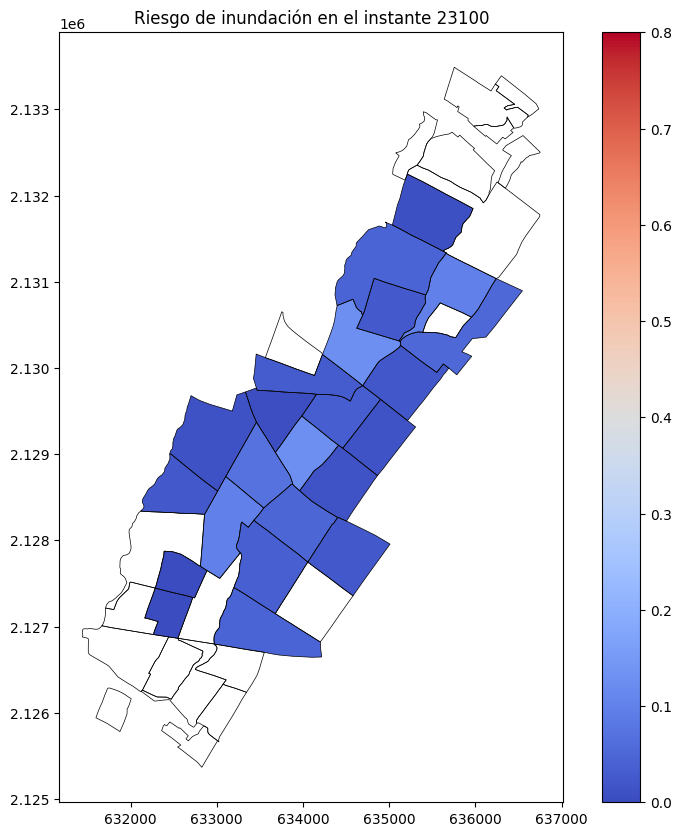

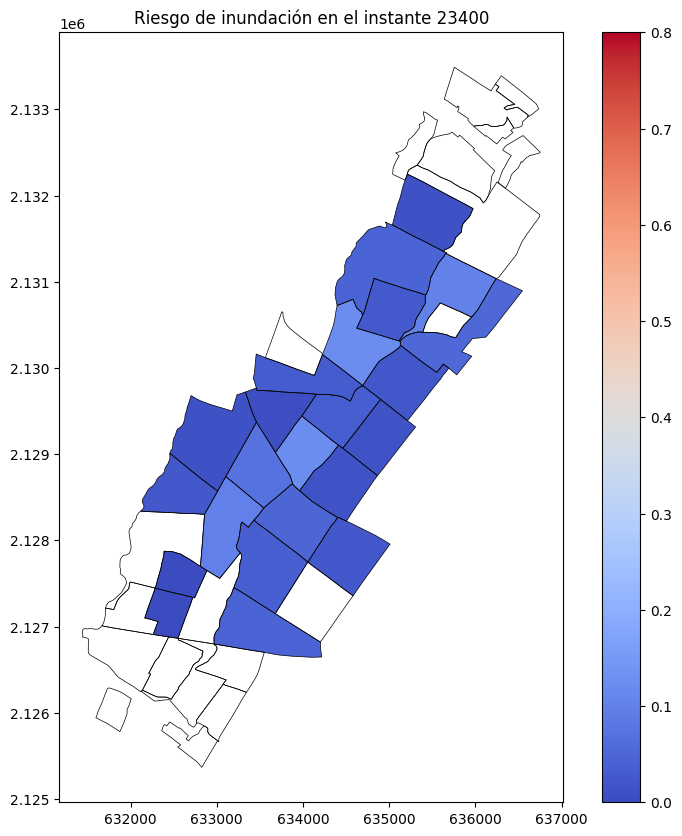

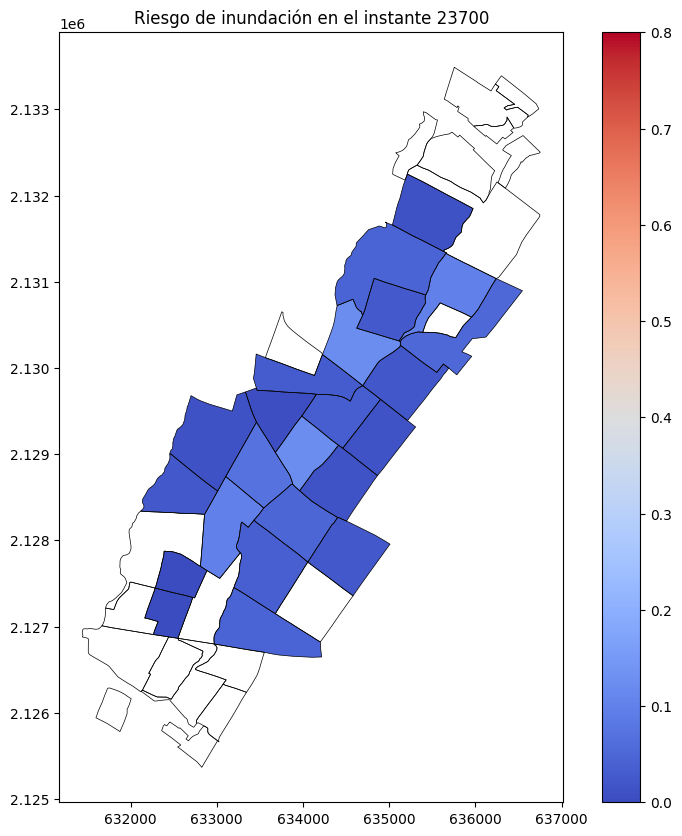

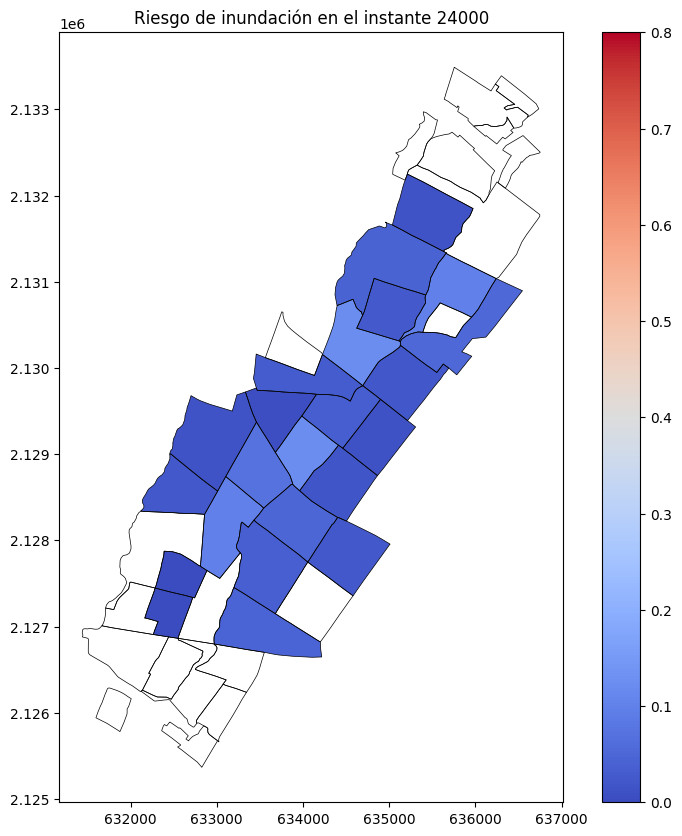

In [444]:
steps = df_proceso2["time"].unique()

for step in steps:
  plot_specific_time(step)